# <p style="text-align:center;">
<span style="font-size:30px;">
<span style="color:blue;">
<b>Housing Prices visualization, Data Analysis and prediction.
    </b>
    </span>
    </span>
    </p>

<span style="color:blue;">
<b>When shopping for a house, consumers explore numerous factors except simply an appealing outlook of a house. These factors parenthetically are, the peak of the basement ceiling, the neighborhood style, the condtion of the house and therefore the proximity to a correct transport system.  a mixture of such factors facilitate to work out the value of a house and these factors are given during a knowledgeset comprising of eighty one instructive  variables. This dataset describes each side of residential homes in Ames, Iowa. Therefore, the given data are going to be explored to draw insights regarding what influnces costs for various houses during this city.</b>
    </span>

<p style="text-align:center;">
<span style="color:blue;">
<span style="font-size:25px;">
<b>Dataset Description
    </b>
    </span>
    </span>
    </p>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
   
<p style="padding: 10px;
              color:white;">
    
    
Here's a brief version of data description file.

SalePrice - the property's sale price in dollars. This is the target

variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

</p>
</div>

<p style="text-align:center;">
<span style="color:crimson;">
<span style="font-size:25px;">Import Libraries
</span>
</span>
</p>

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from scipy.stats import skew, norm
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.ensemble import RandomForestRegressor

<p style="text-align:center;">
<span style="color:blue;">
<span style="font-size:20px;">Read Our Data
</span>
</span>
</p> 

In [42]:
trainData = pd.read_csv("train.csv")

In [22]:
pd.reset_option('display.max_row')
pd.reset_option('display.max_columns')
trainData.head(20).style.background_gradient(cmap='Blues')

In [23]:
#Identify the train data types
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div class="alert alert-info">
The object are CategoricalData so we will separate the data set to just be numerical only
    </div>

In [33]:
numericalData = trainData.select_dtypes(include=[np.number])
numericalData = numericalData.drop(['Id'], axis = 1)
numericalData.head(20).style.background_gradient(cmap='Blues')

<p style="text-align:center;">
<span style="color:blue;">
<span style="font-size:20px;">The numerical Features
    </span>
    </span>
    </p>

In [36]:
numerical_features = numericalData.columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<div class="alert alert-info">
<span style="font-size:15px;">Eidently since we separated the numerical data from the categorical data we additionally have to show it
    </span>
    </div>

In [38]:
CategoricalData = trainData.select_dtypes(exclude=[np.number])
CategoricalData.head(20)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1        RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8        RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9        RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
11       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
12       RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
13       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
14       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
15       RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
16       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
17       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
18       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
19       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

   Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0       CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1       Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2       CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3       Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4       NoRidge       Norm  ...     Attchd          RFn         TA         TA   
5       Mitchel       Norm  ...     Attchd          Unf         TA         TA   
6       Somerst       Norm  ...     Attchd          RFn         TA         TA   
7        NWAmes       PosN  ...     Attchd          RFn         TA         TA   
8       OldTown     Artery  ...     Detchd          Unf         Fa         TA   
9       BrkSide     Artery  ...     Attchd          RFn         Gd         TA   
10       Sawyer       Norm  ...     Detchd          Unf         TA         TA   
11      NridgHt       Norm  ...    BuiltIn          Fin         TA         TA   
12       Sawyer       Norm  ...     Detchd          Unf         TA         TA   
13      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
14        NAmes       Norm  ...     Attchd          RFn         TA         TA   
15      BrkSide       Norm  ...     Detchd          Unf         TA         TA   
16        NAmes       Norm  ...     Attchd          Fin         TA         TA   
17       Sawyer       Norm  ...    CarPort          Unf         TA         TA   
18      SawyerW       RRAe  ...     Detchd          Unf         TA         TA   
19        NAmes       Norm  ...     Attchd          Unf         TA         TA   

   PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0           Y    NaN    NaN         NaN       WD        Normal  
1           Y    NaN    NaN         NaN       WD        Normal  
2           Y    NaN    NaN         NaN       WD        Normal  
3           Y    NaN    NaN         NaN       WD       Abnorml  
4           Y    NaN    NaN         NaN       WD        Normal  
5           Y    NaN  MnPrv        Shed       WD        Normal  
6           Y    NaN    NaN         NaN       WD        Normal  
7           Y    NaN    NaN        Shed       WD        Normal  
8           Y    NaN    NaN         NaN       WD       A

<p style="text-align:center;">
<span style="color:blue;">
<span style="font-size:15px;">The Categorical Features
    </span>
    </span>
    </p>

In [41]:
categorical_features = CategoricalData.columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;">Numerical Data Exploration
    </span>
    </p>
    </div>

In [49]:
numericalData.describe().T.style.background_gradient(cmap = "Purples")

A summary displaying a dialogue of the statistics indicated above is highlighted below:

* The target variable **SalePrice** has the highest standard deviation (79442.503) in the data set. This due to the fact the distinction in the minimal and maxmimum prices is very large which is a everyday occurance in the actual world as prices of homes range significantly depending on the various factors which may be seen in the already given data setSame with the **lotArea**.

* However the Standard deviation is seen to be lower in variables such as **OverallQual, Overallcond, Mosold, and Yrsold** and this is because, if we use the **Yrsold** as and example we'll find out that the lowest yrsold is 2006 while the highest yrsold is 2010 and it's seen that the distinction in **min** and **Max** is little hence the standard deviation is little.

* The oldest building was built in the year 1872 and the newest building was built in the year 2010 according to the dataset

* The cheapest house was sold at 34 900 dollars while the most expesive was sold at the price of 755 000 dollars.

* Most of the houses were sold in the year 2009 as this data falls in the 75 % quantile.

* The oldest garage among these houses was built in the year 1900 while the recently built garage was done in the year 2010.

<p style="text-align:center;">
<span style="color:Blue;">
<span style="font-size:25px;">
<b>Average Sales Price
    </b>
</span>
</span>
</p>

In [110]:
fig = px.histogram(numericalData, x = "SalePrice", marginal = "box",
                  title = "Histogram of the Average Sales Price",
                   color_discrete_sequence = ["#FF64D6"])
fig.update_layout(bargap = 0.2)
fig.update_traces(marker = dict(line = dict(width = 1.5, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18, color = "#FF64D6"))
fig.show()

<p style="text-align:center;">
<span style="color:Blue;">
<span style="font-size:25px;">
<b>Average Sales Price by Year sold
    </b>
</span>
</span>
</p>

In [104]:
fig = px.box(numericalData, x = "YrSold", y = "SalePrice", color = "SalePrice",
                  color_discrete_sequence = ["#FF64D6"],
                  title = "Average Sales Price by Year Sold")
fig.update_yaxes(showgrid=True, gridwidth=0.05, gridcolor='LightPink')
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 17, color = "#FF64D6"))
fig.update_traces(fillcolor = "#000000", showlegend = False)
fig.update_traces(marker = dict(size = 100, line = dict(width = 50, color = "#FFFFFF")))
fig.show()


<p style="text-align:center;">
<span style="color:Blue;">
<span style="font-size:20px;">
<b>The Distribution of  the Variables in the Numerical Data
    </b>
    </span>
    </span>
    </p>

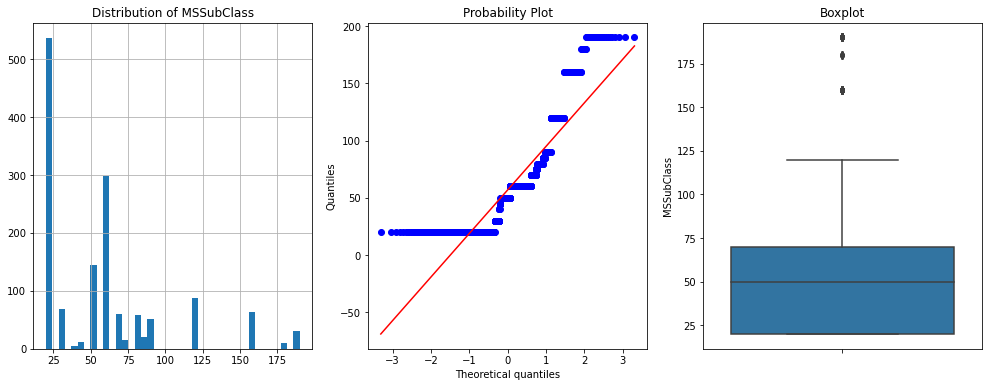

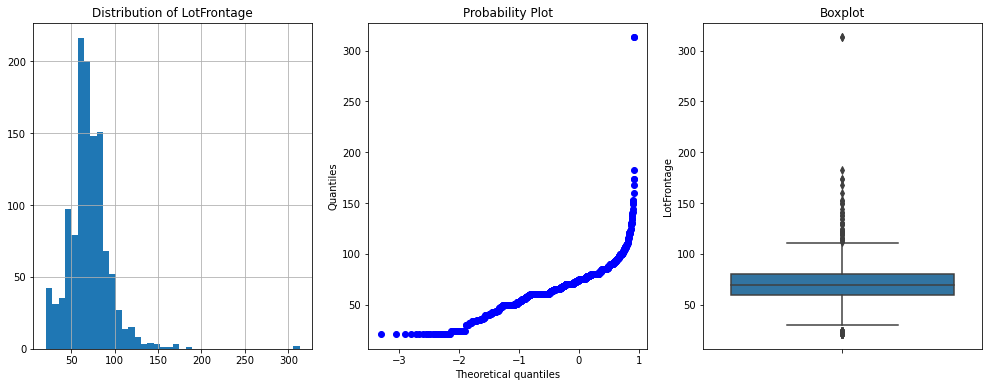

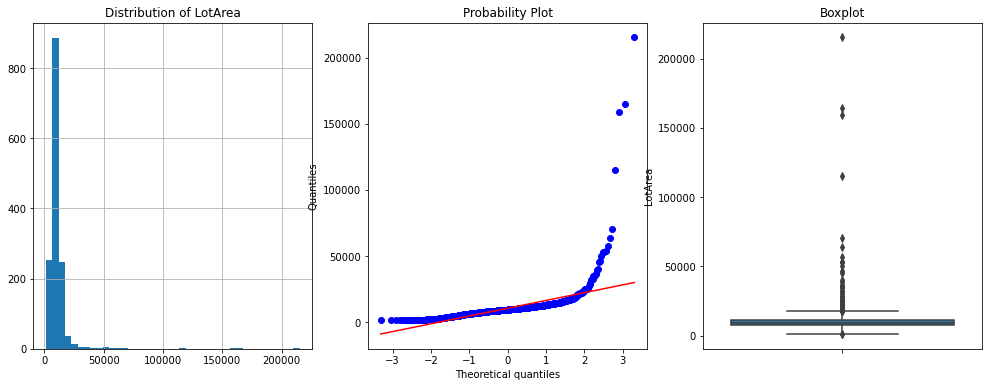

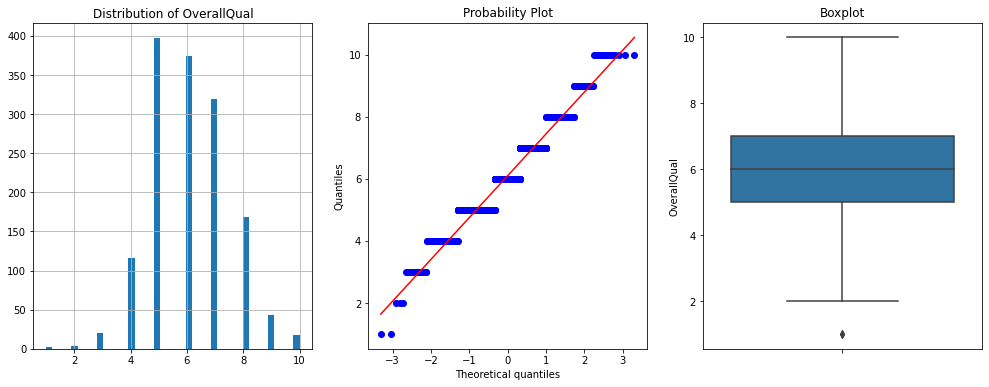

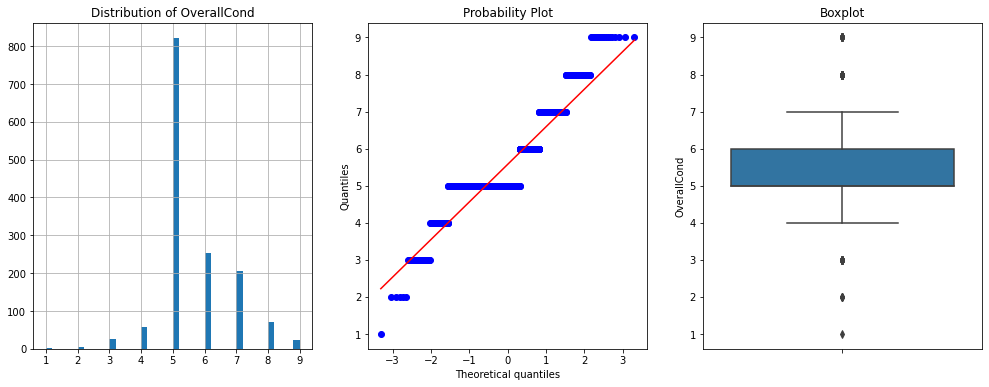

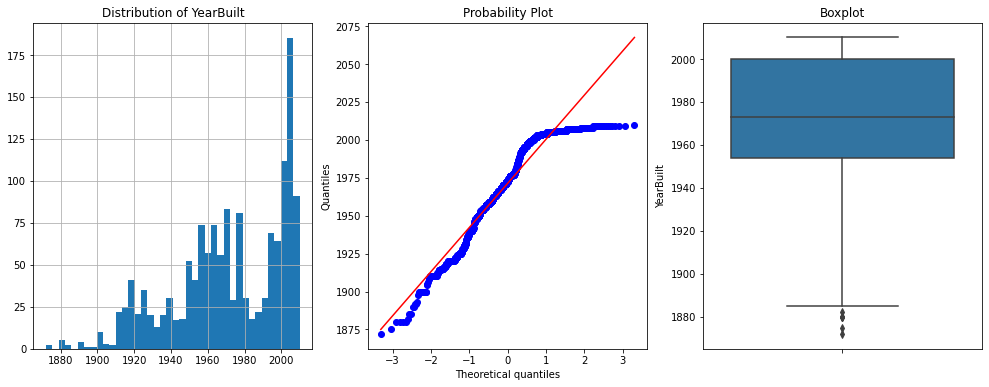

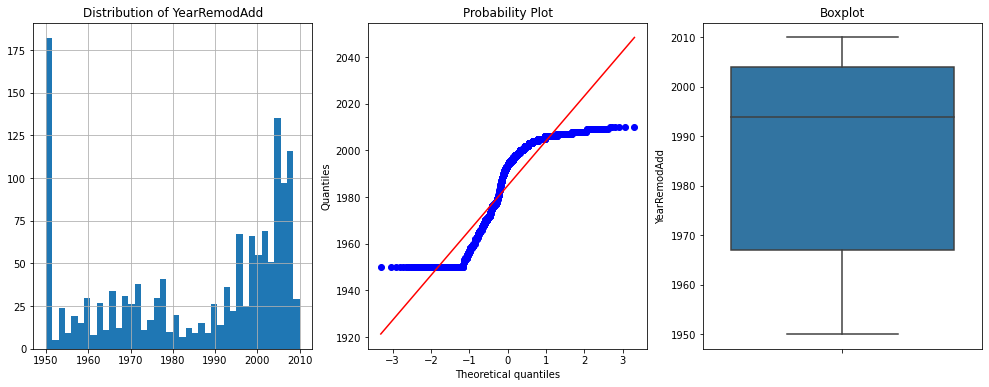

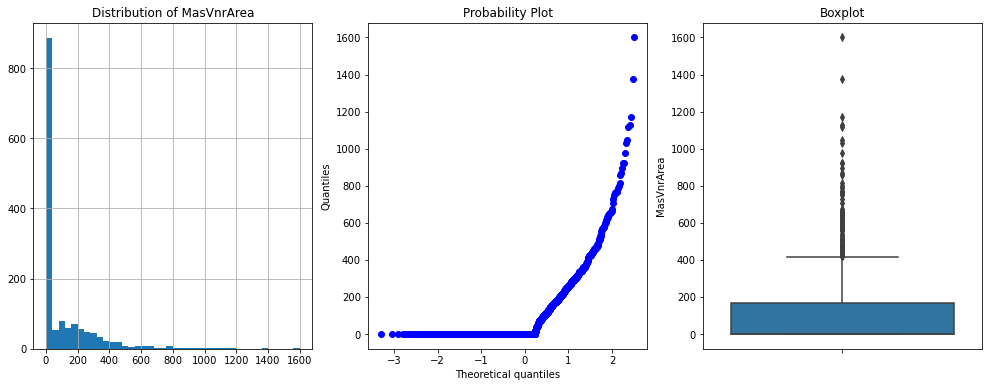

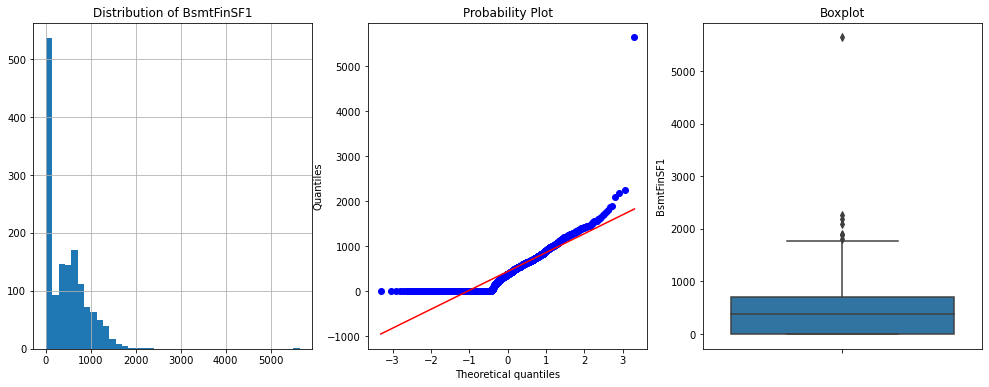

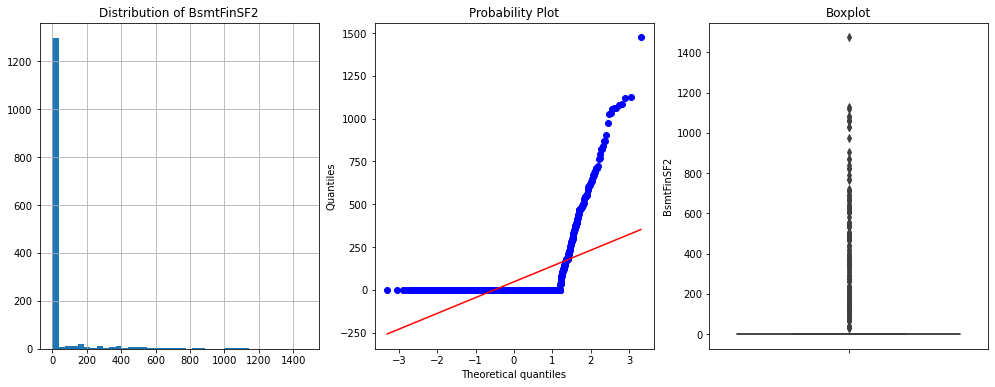

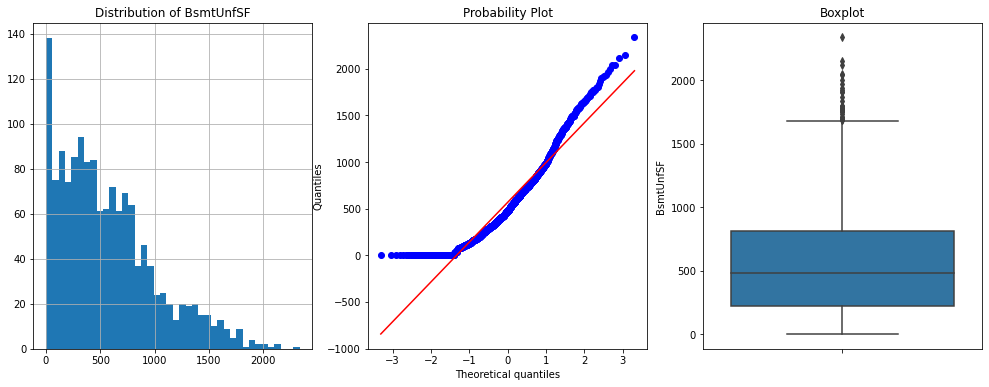

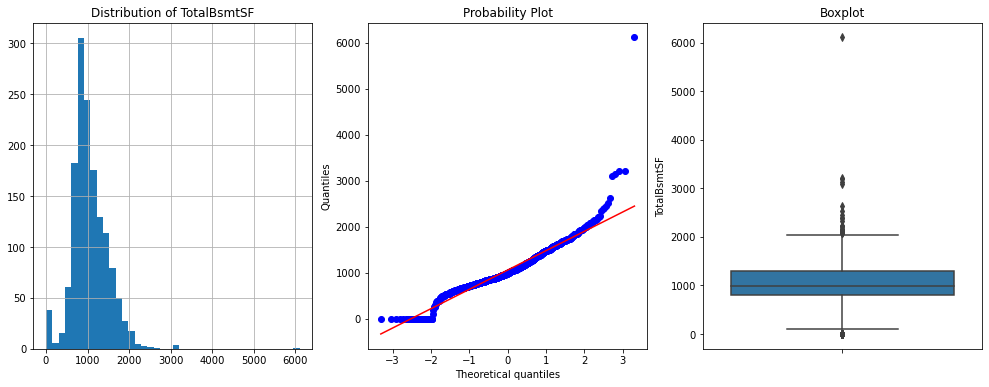

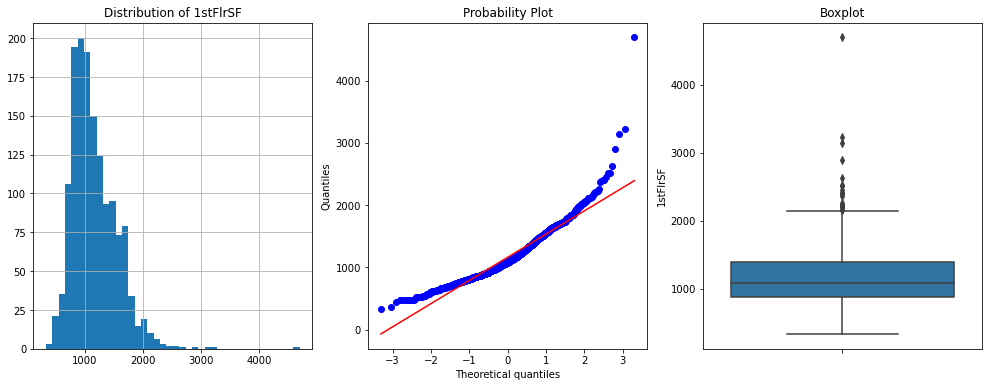

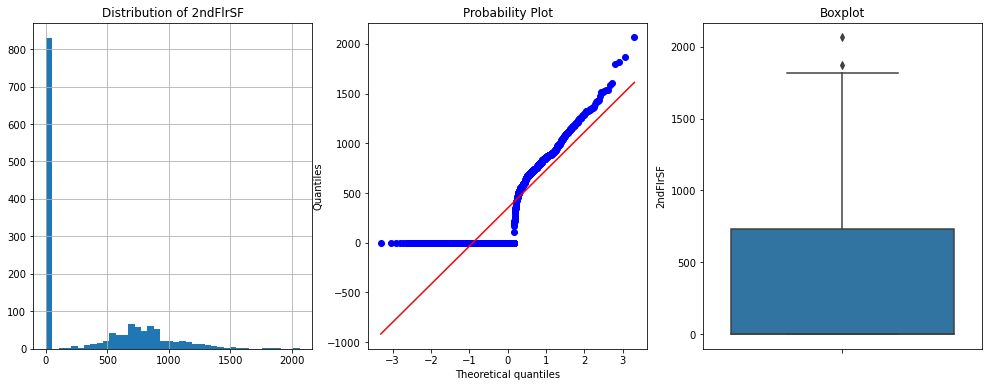

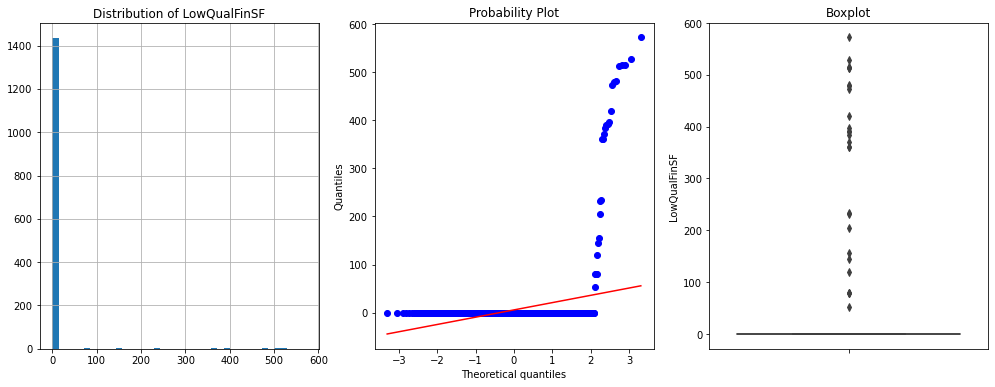

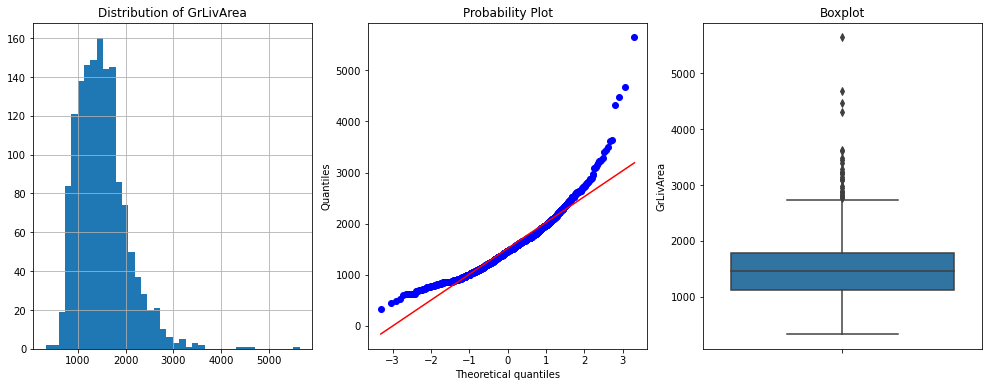

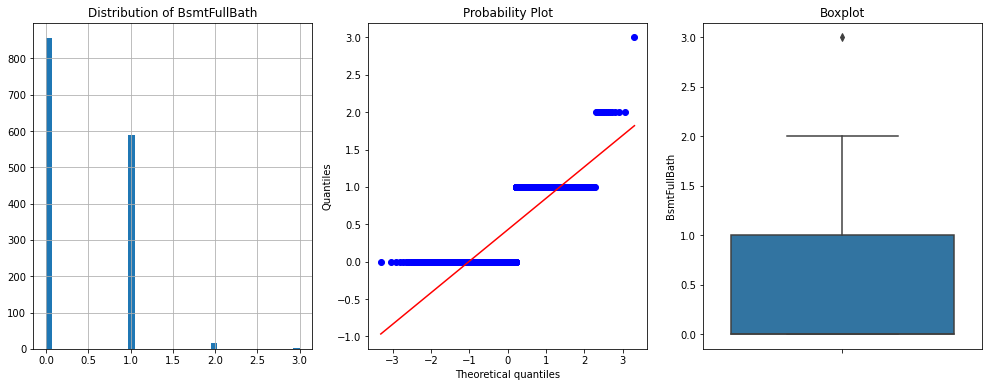

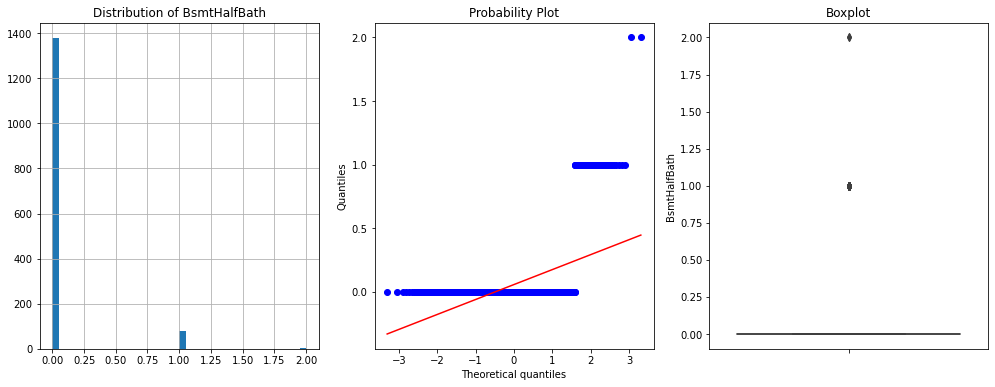

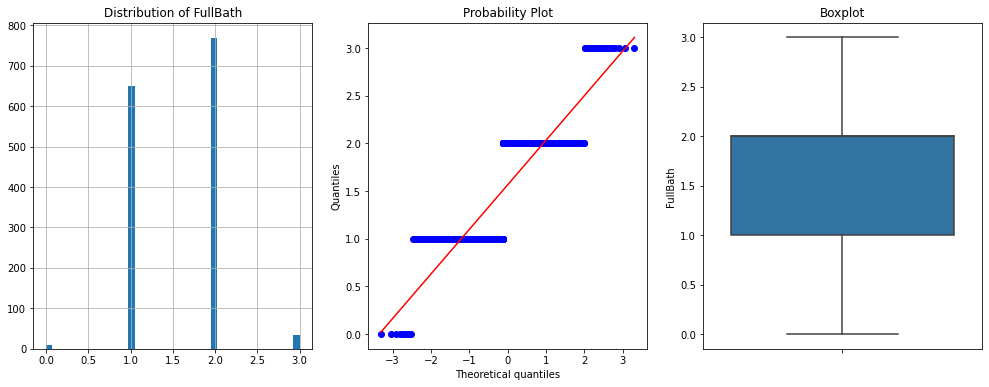

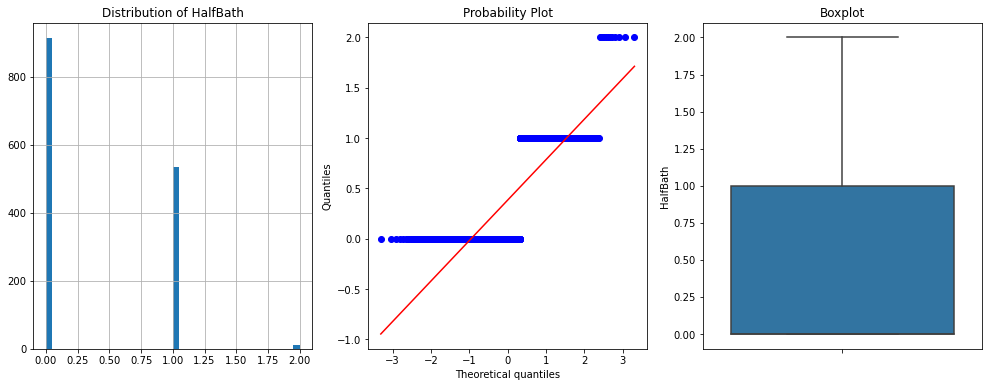

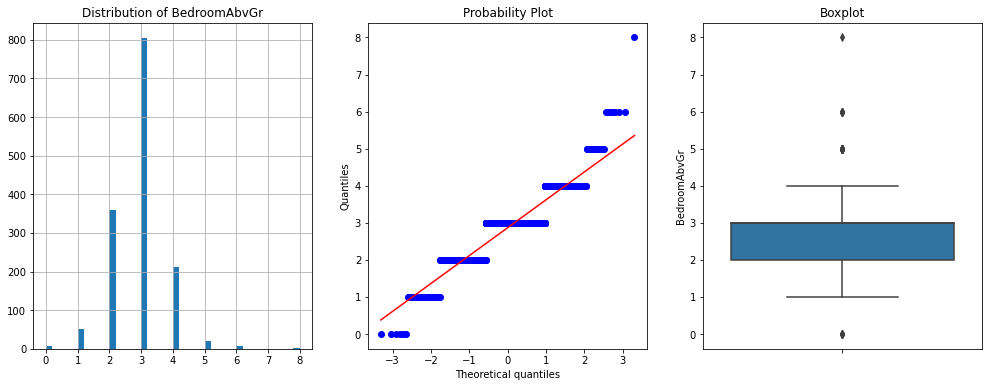

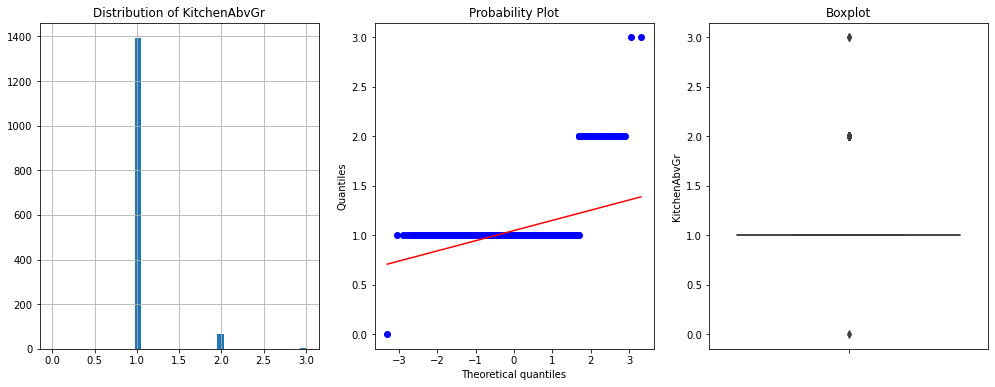

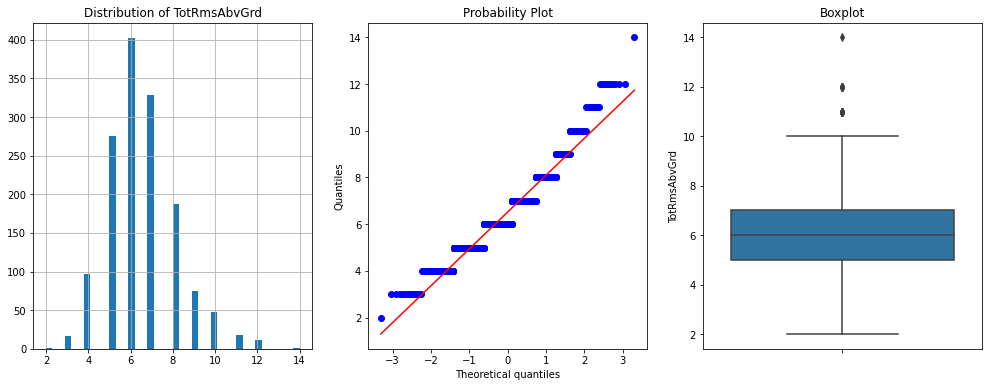

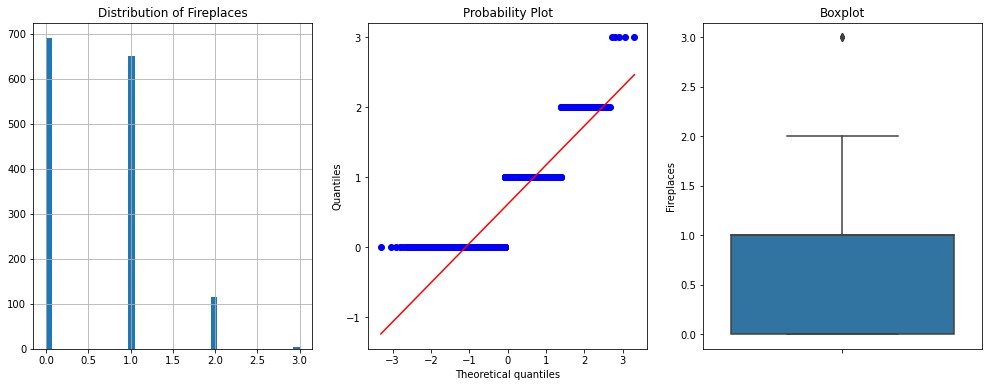

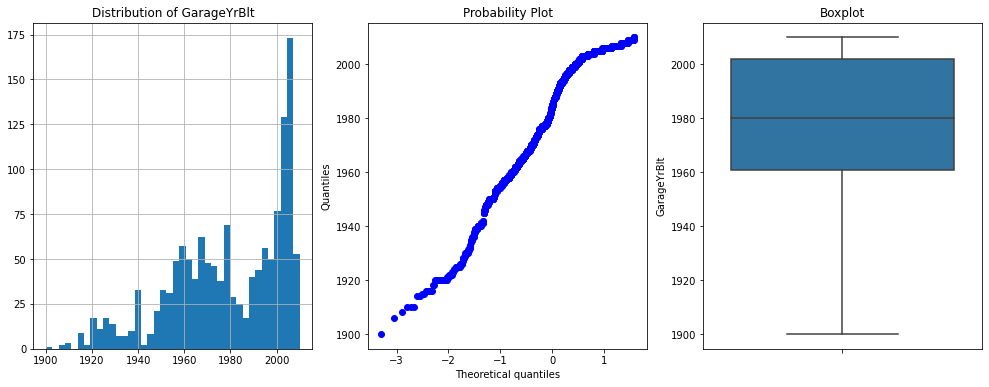

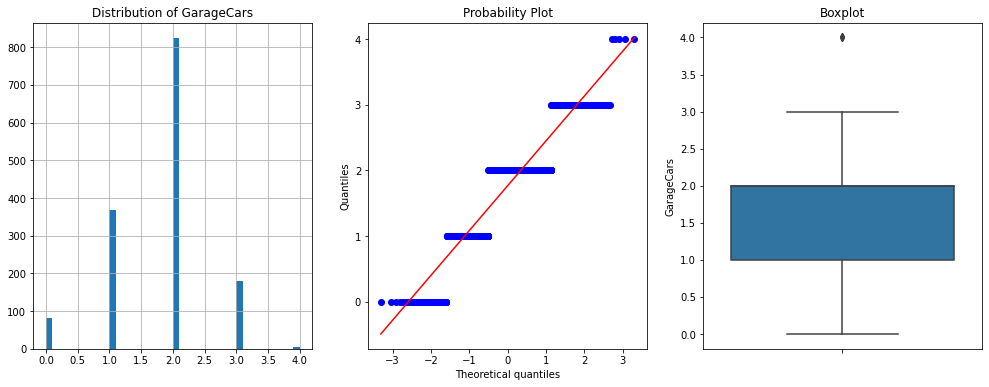

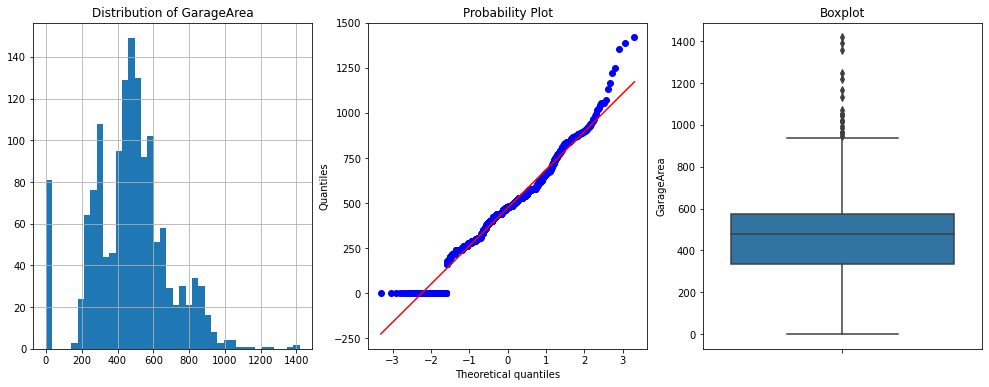

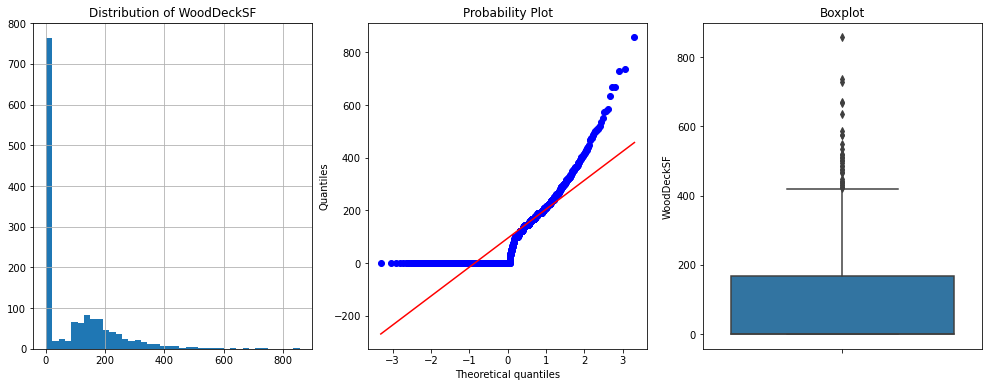

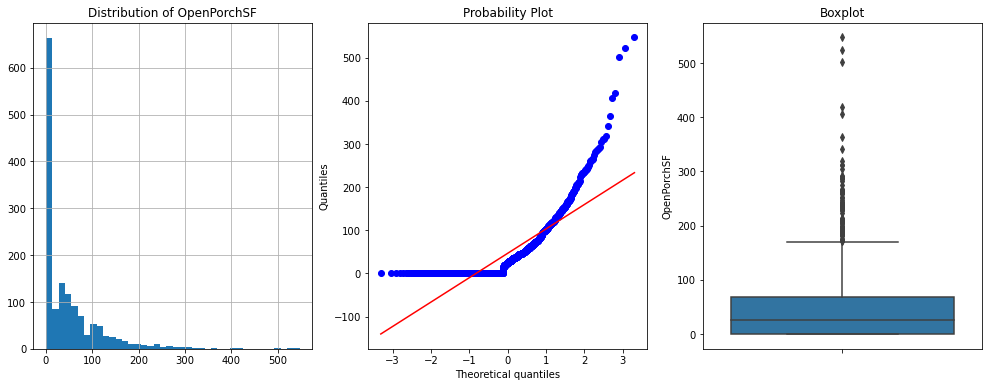

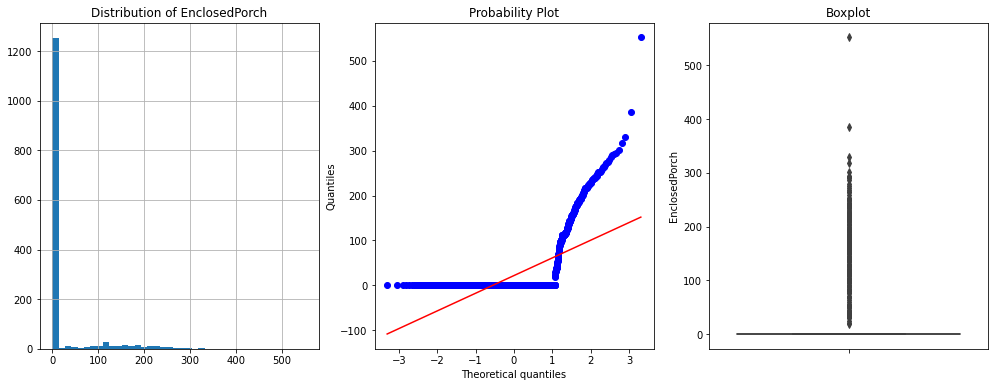

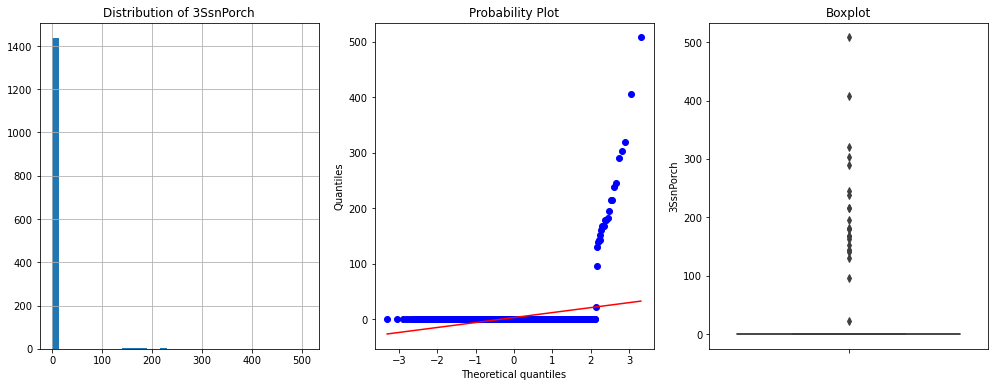

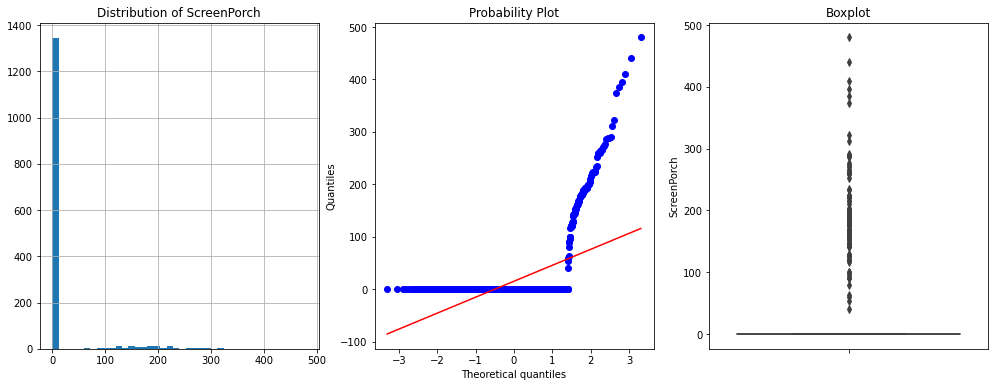

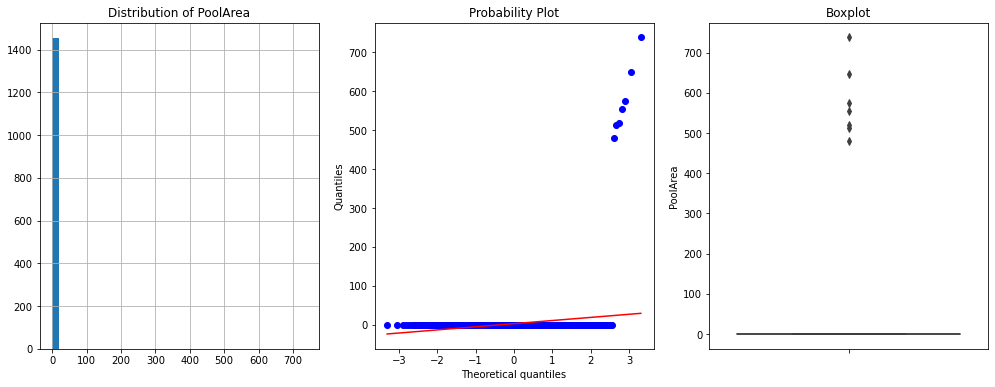

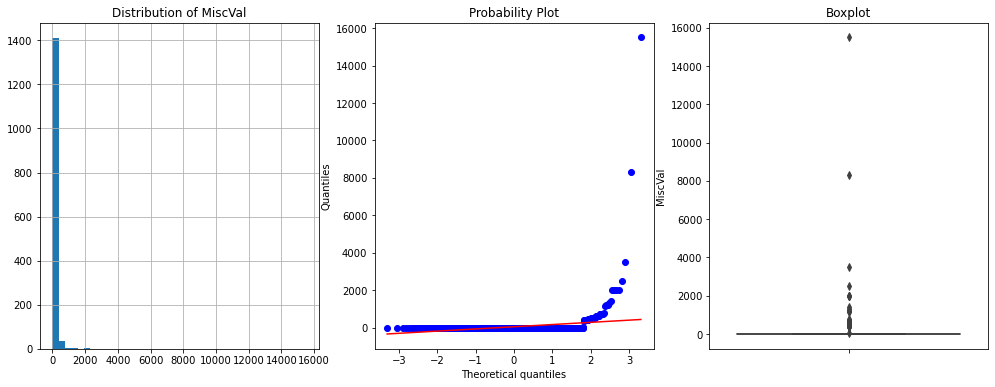

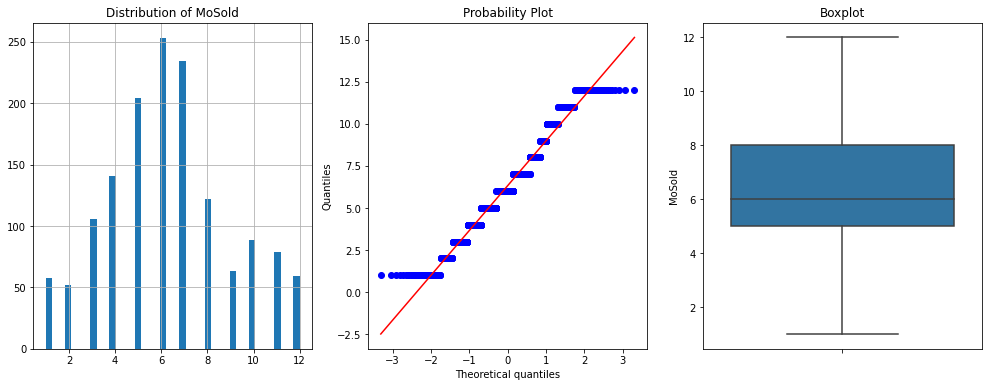

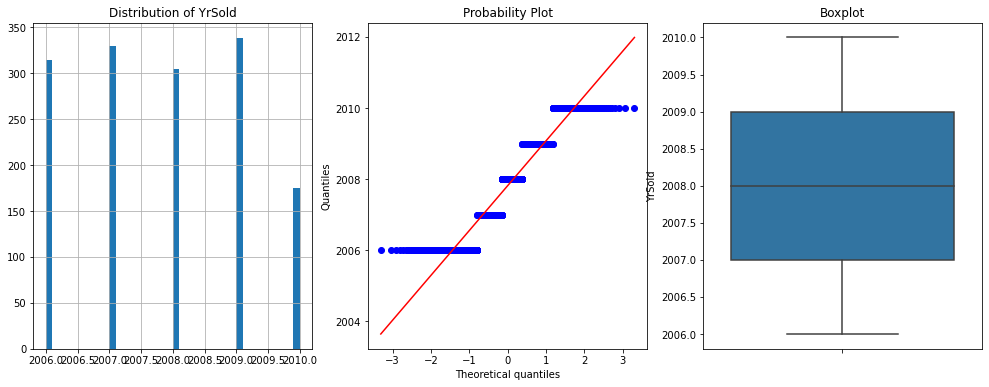

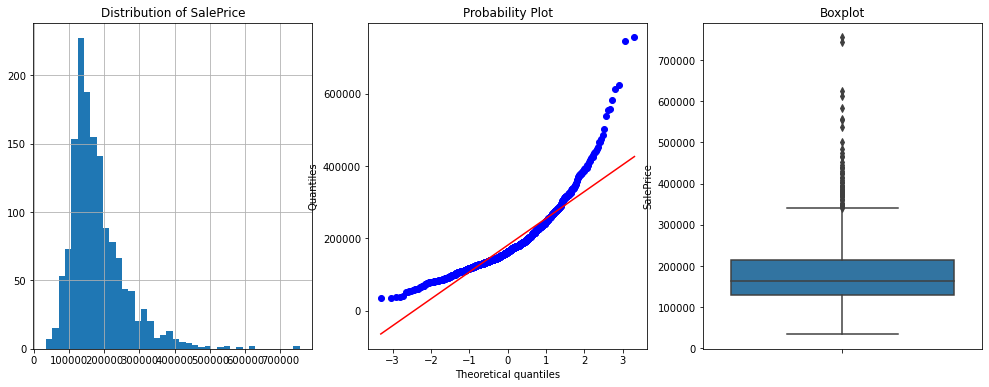

In [109]:
def num_plot(df, var):
    fig = plt.figure(figsize = (17, 6))
    plt.subplot(1,3,1)
    df[var].hist(bins = 40)
    plt.title(f"Distribution of {var}")
    
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist = "norm", plot = plt)
    plt.ylabel('Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()
    
for var in numericalData:
    num_plot(trainData, var)


<p style="text-align:center;">
<span style="color:Blue;">
<span style="font-size:20px;">
<b>Compering each Numericalvariable to our target variable (SalePrice)
    </b>
    </span>
    </span>
    </p>

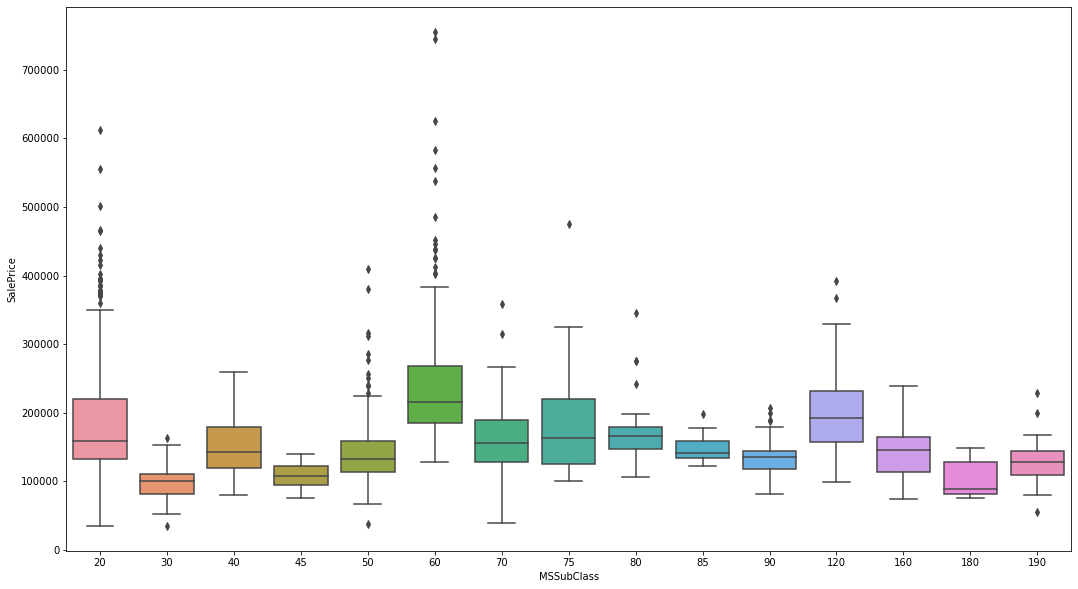

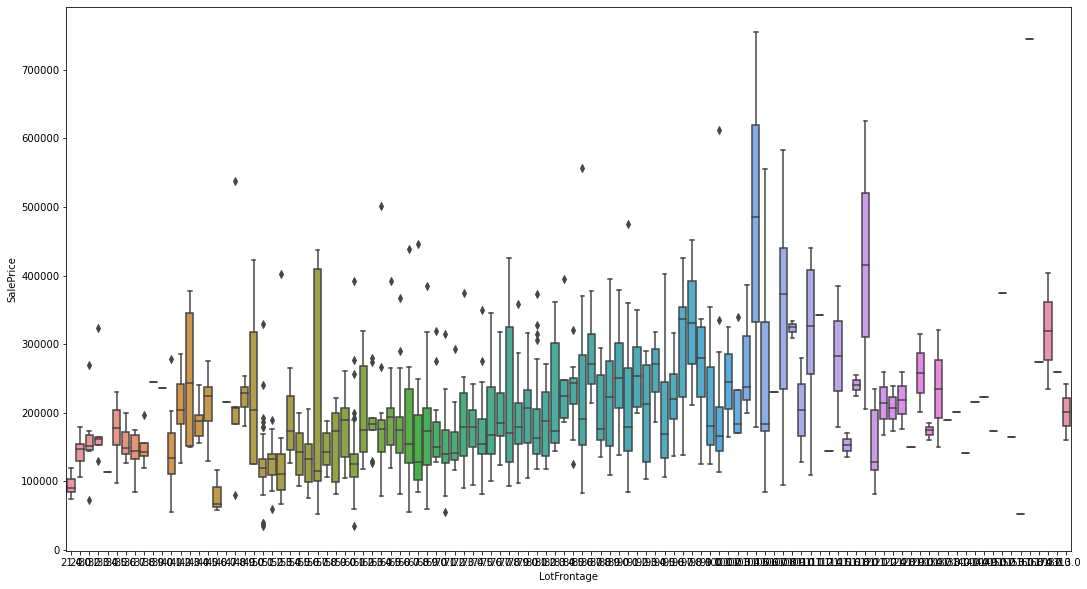

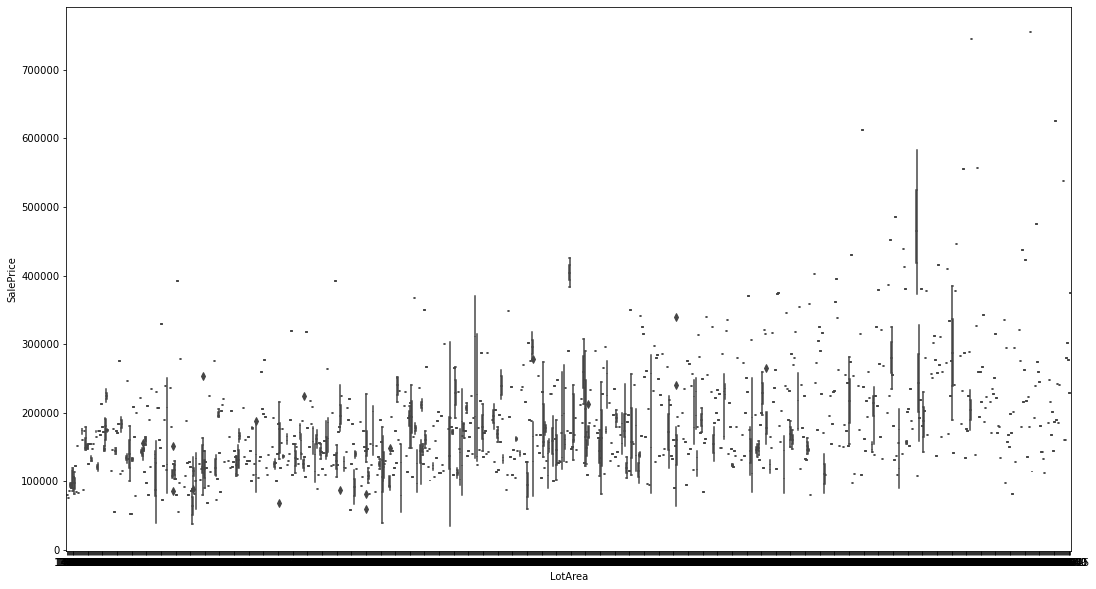

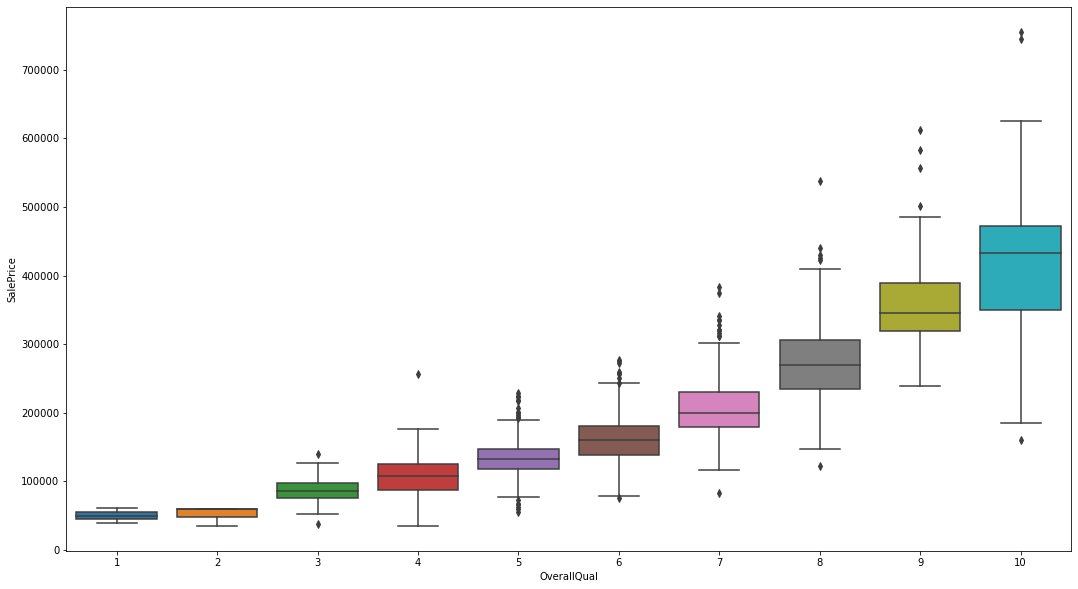

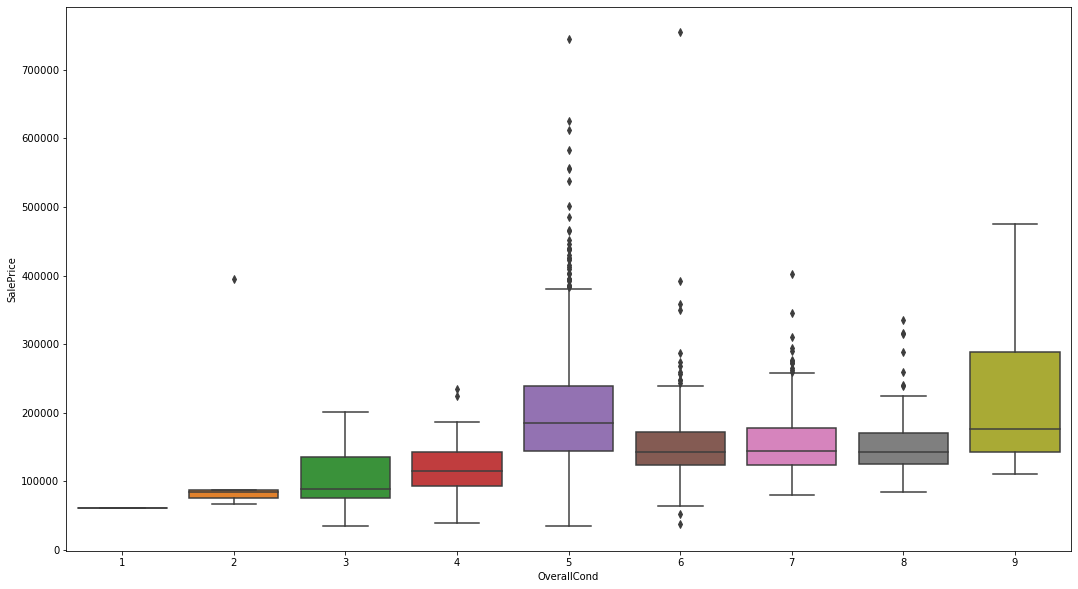

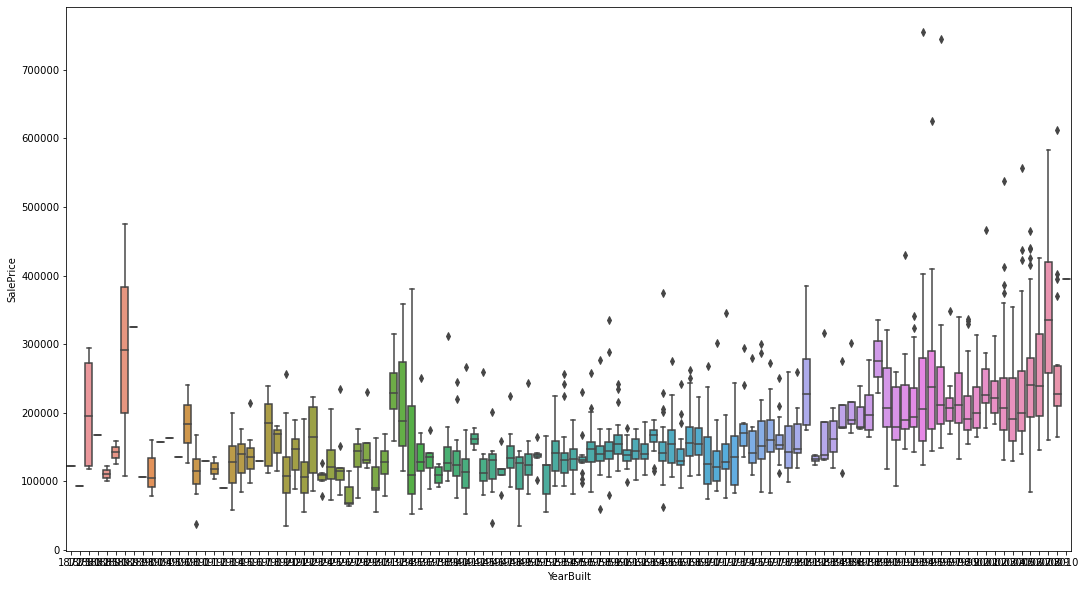

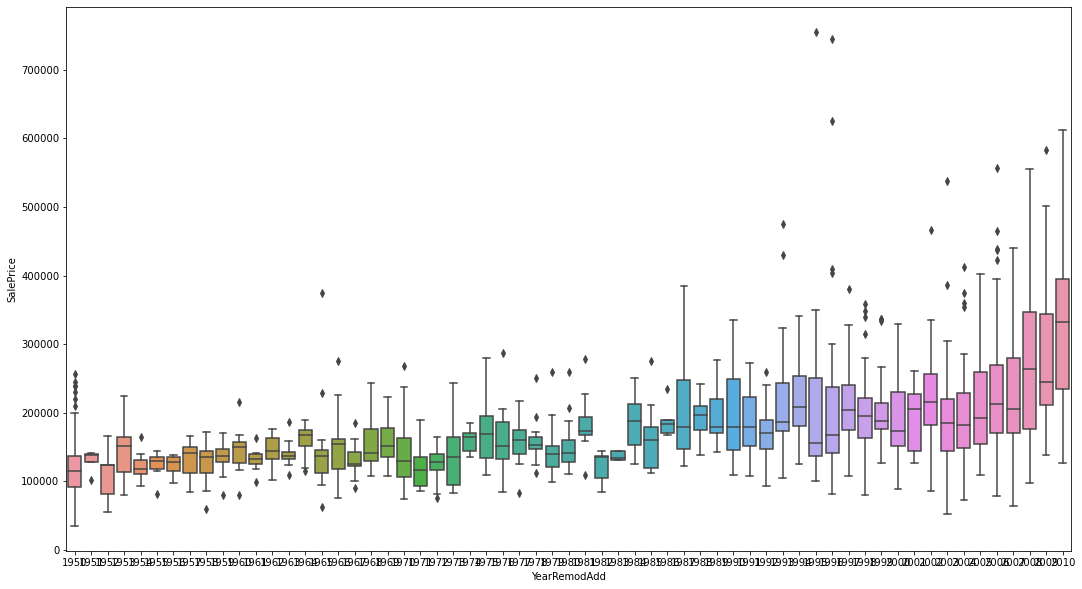

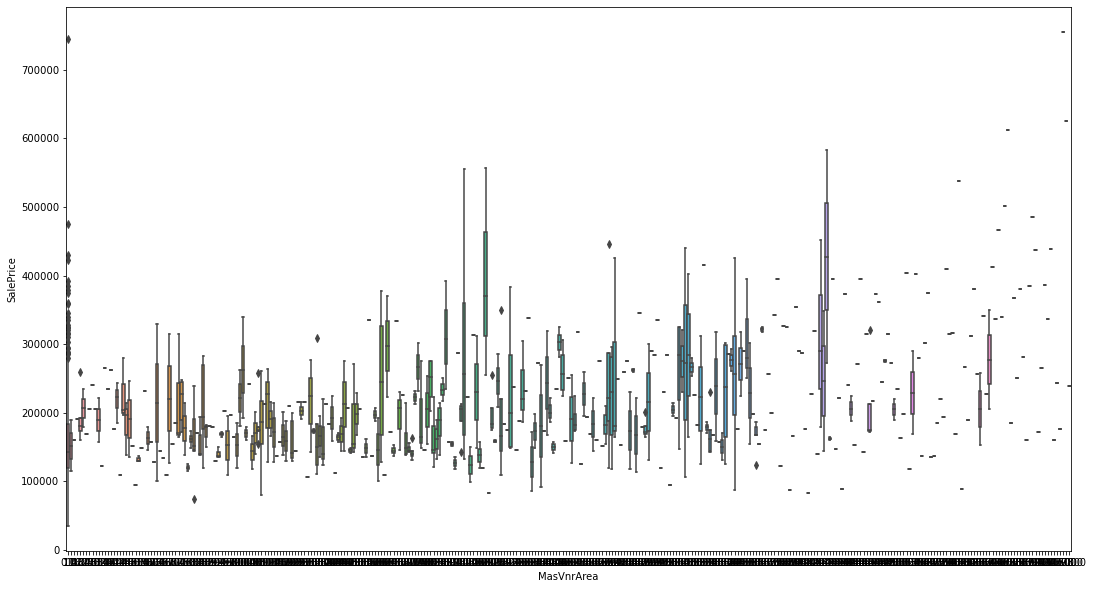

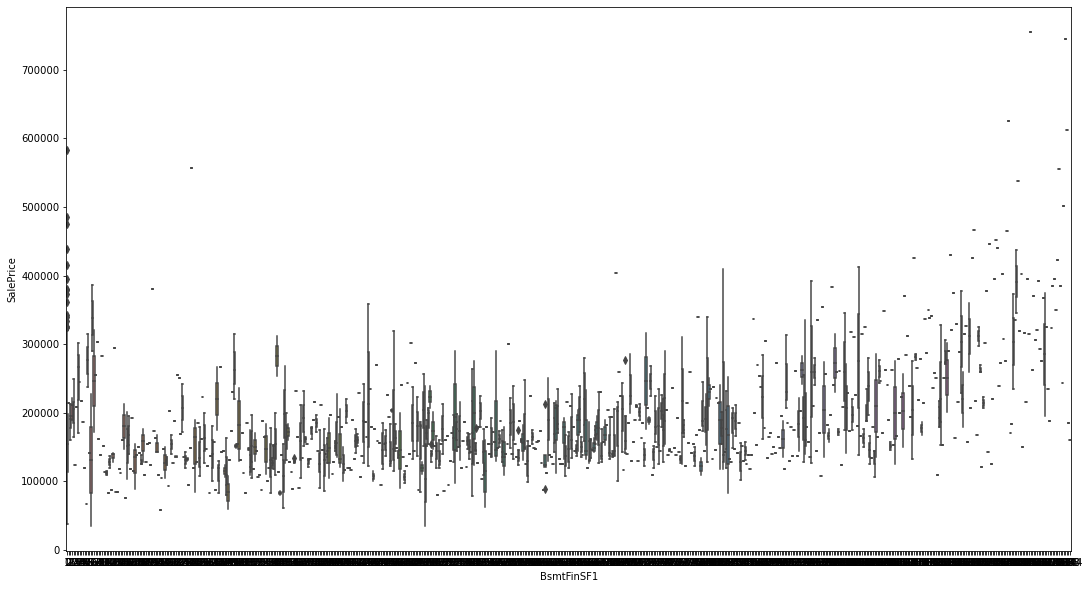

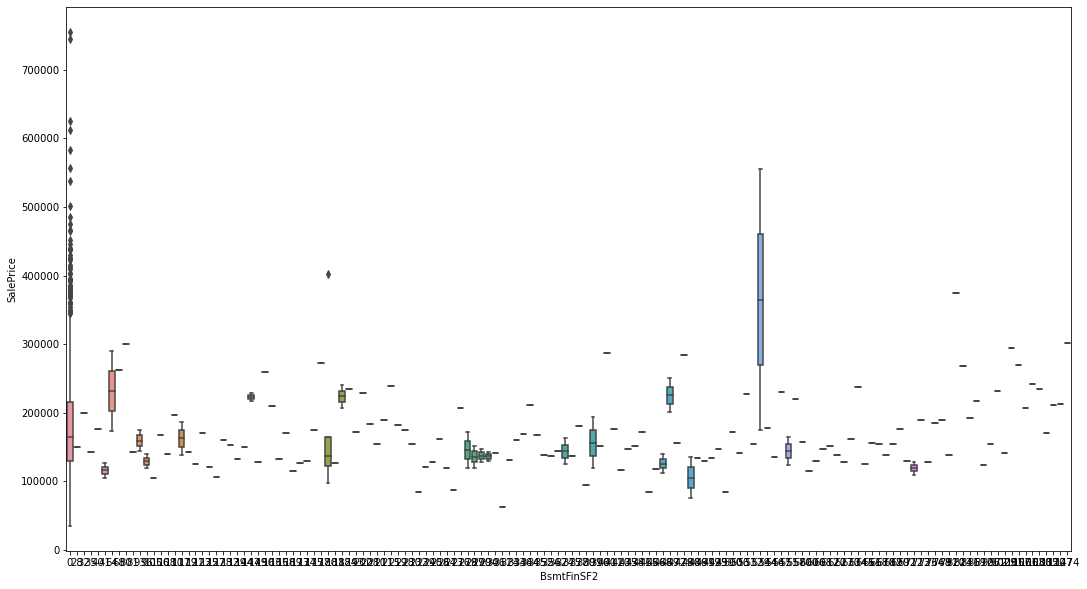

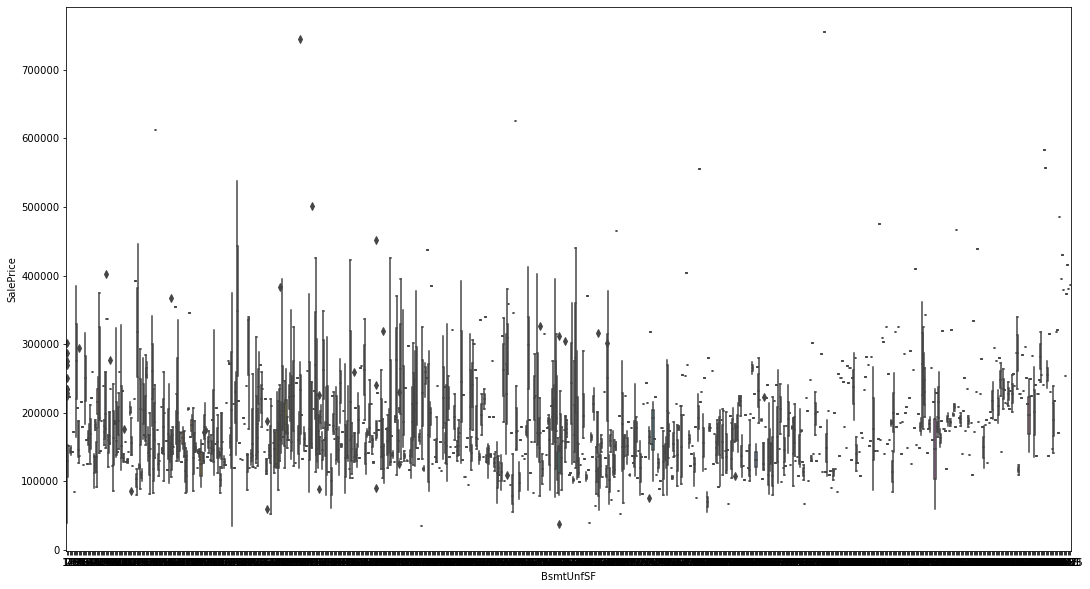

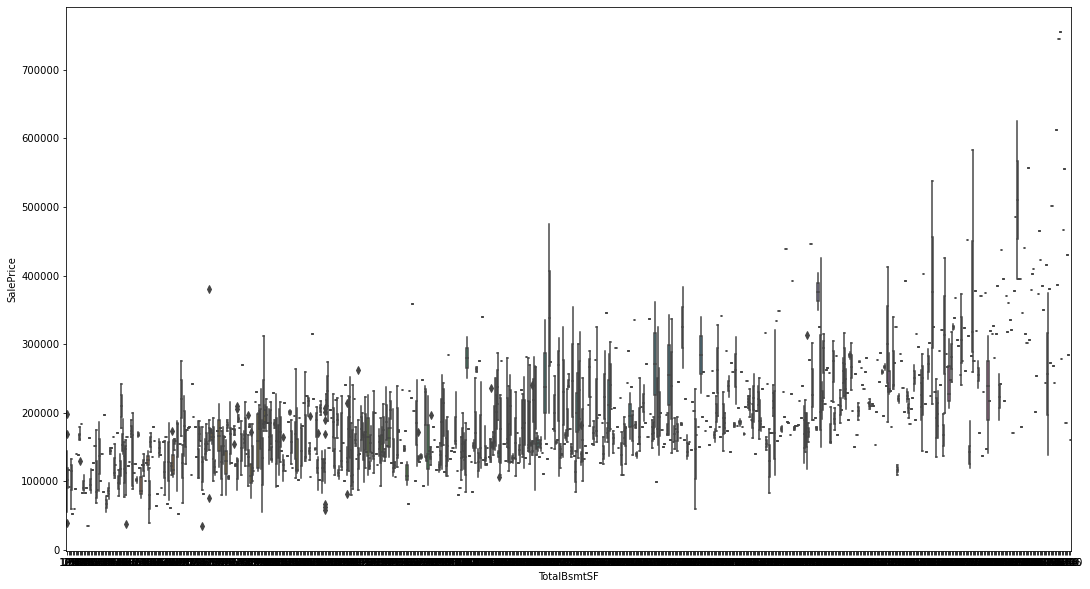

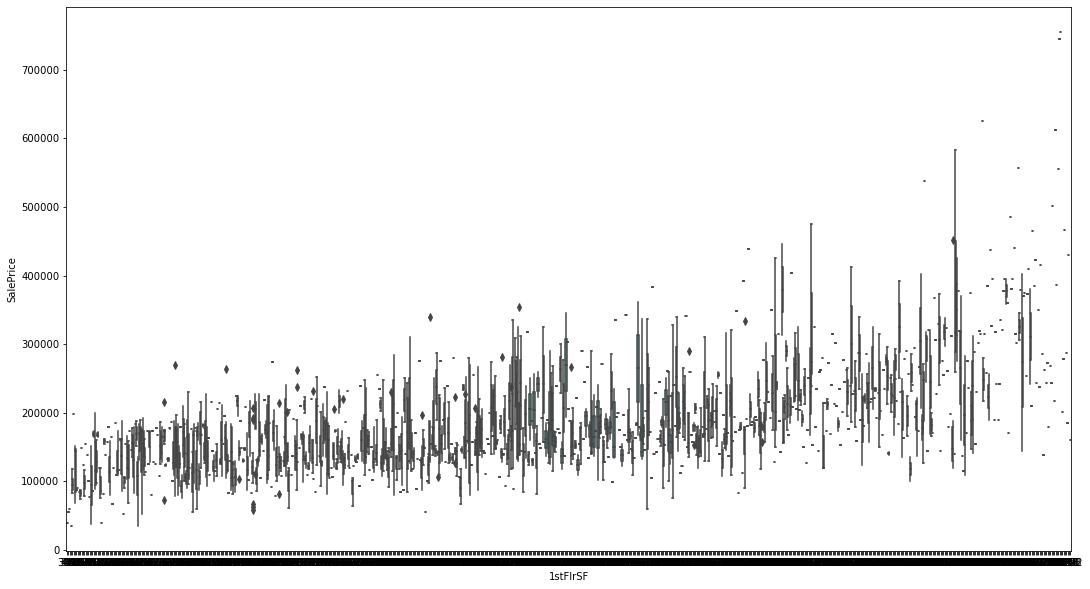

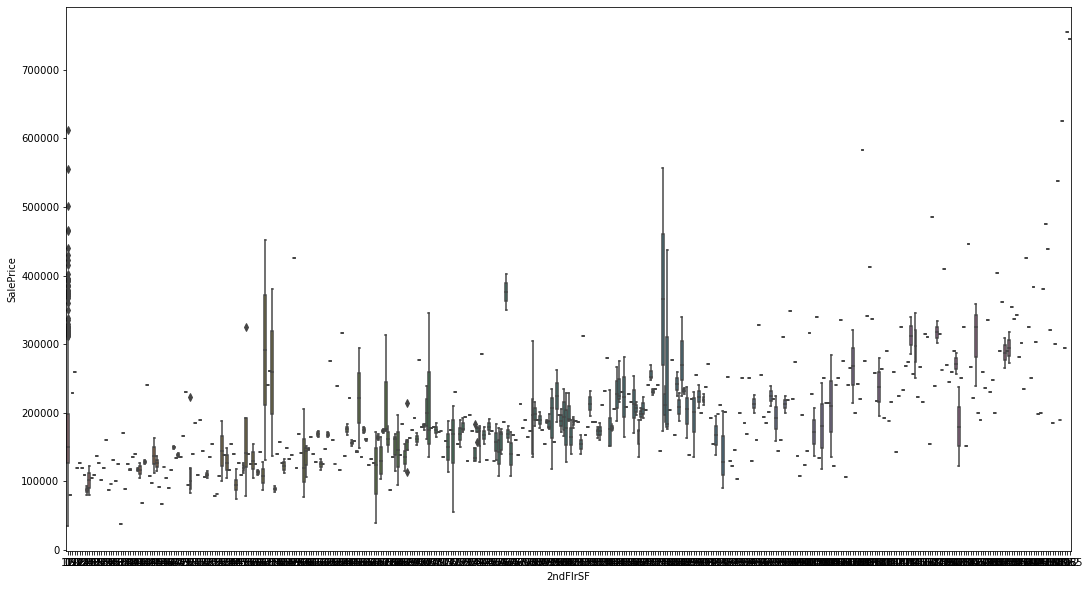

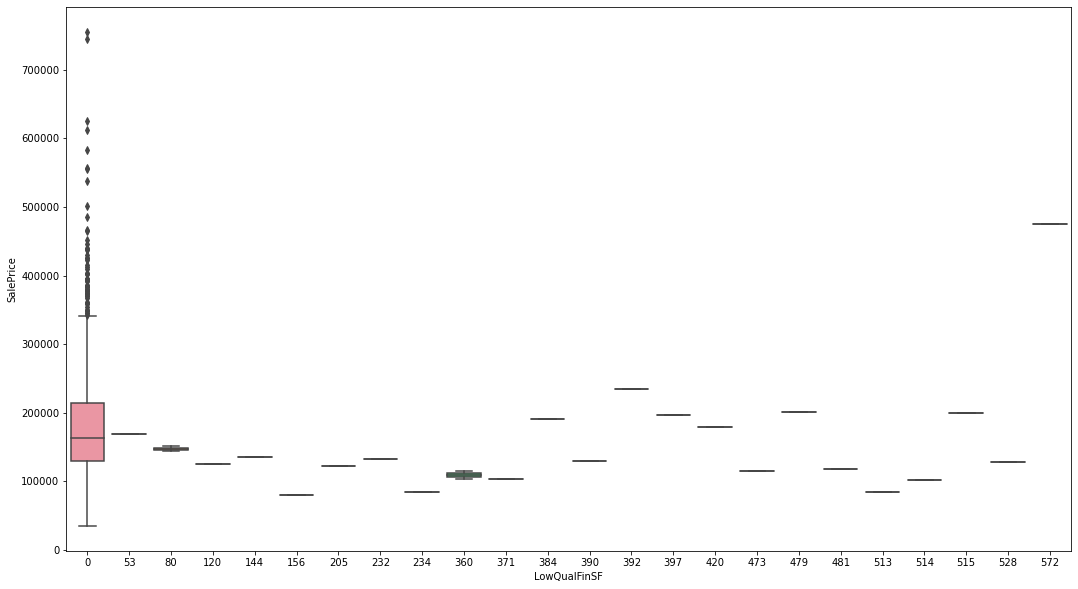

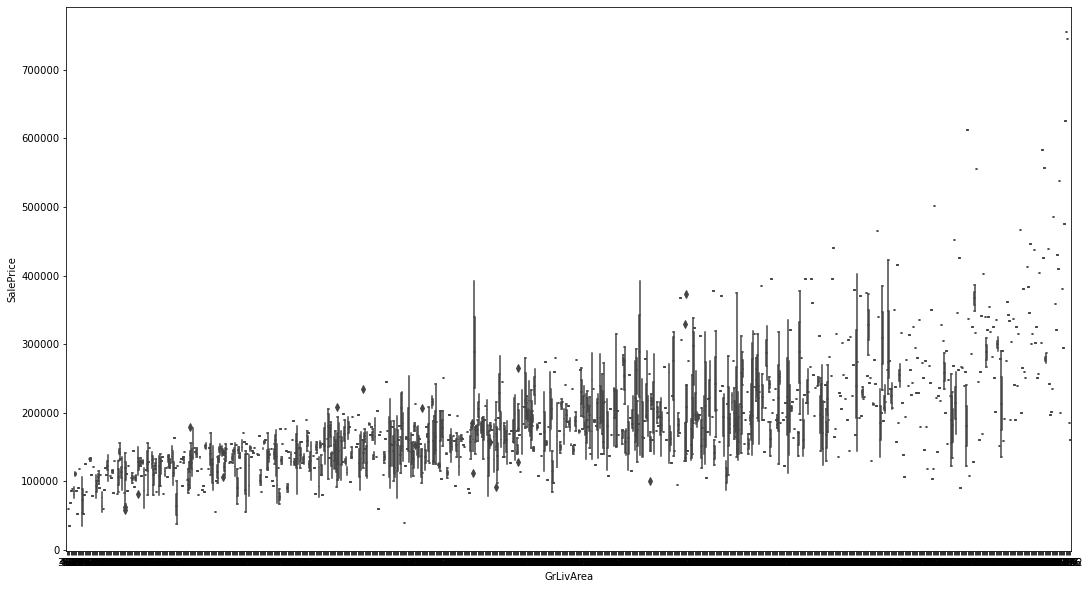

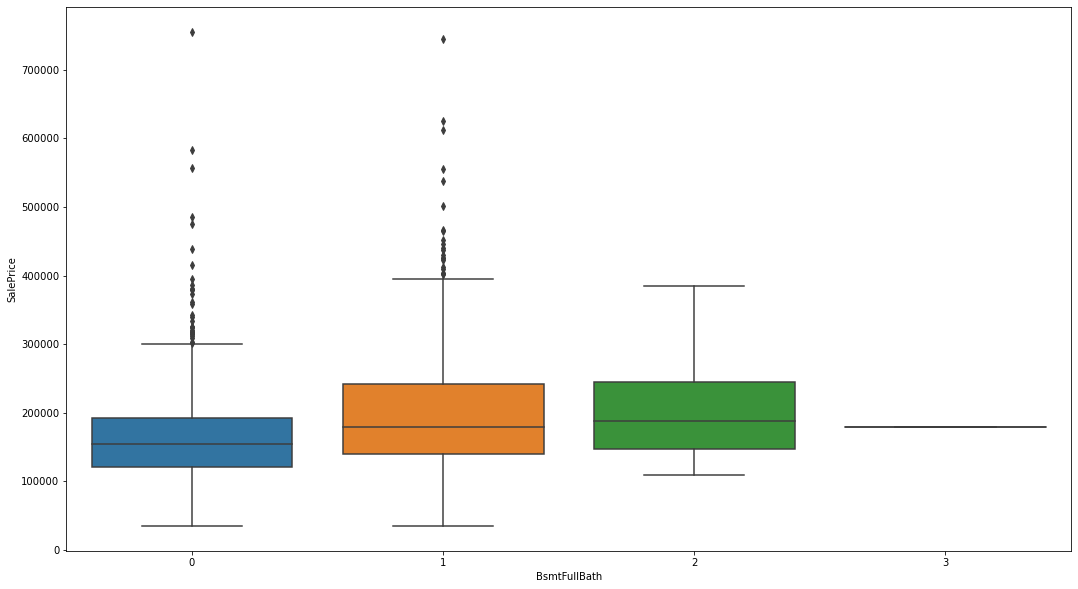

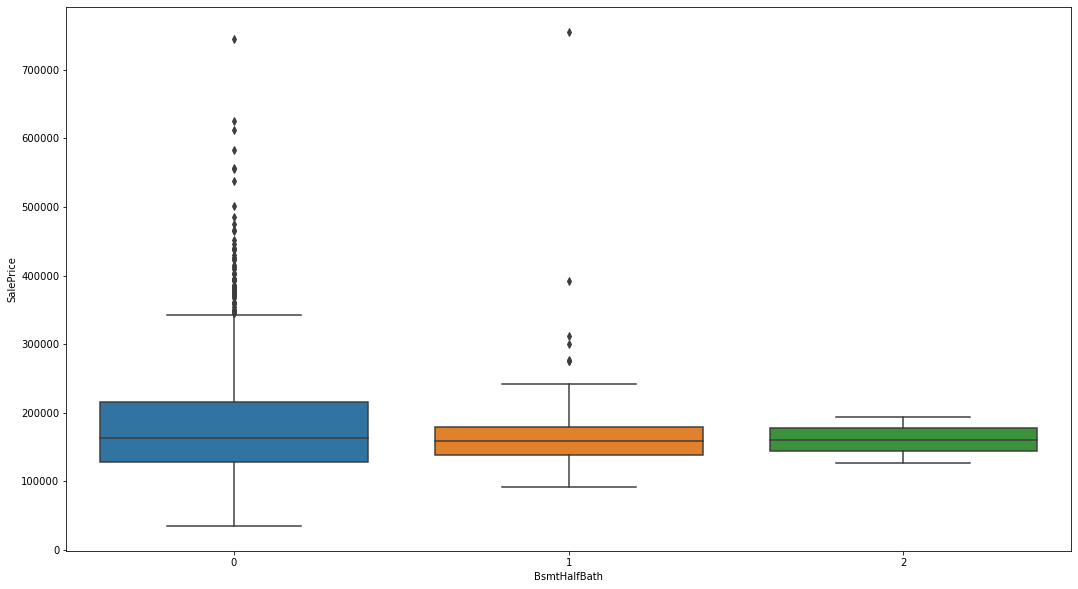

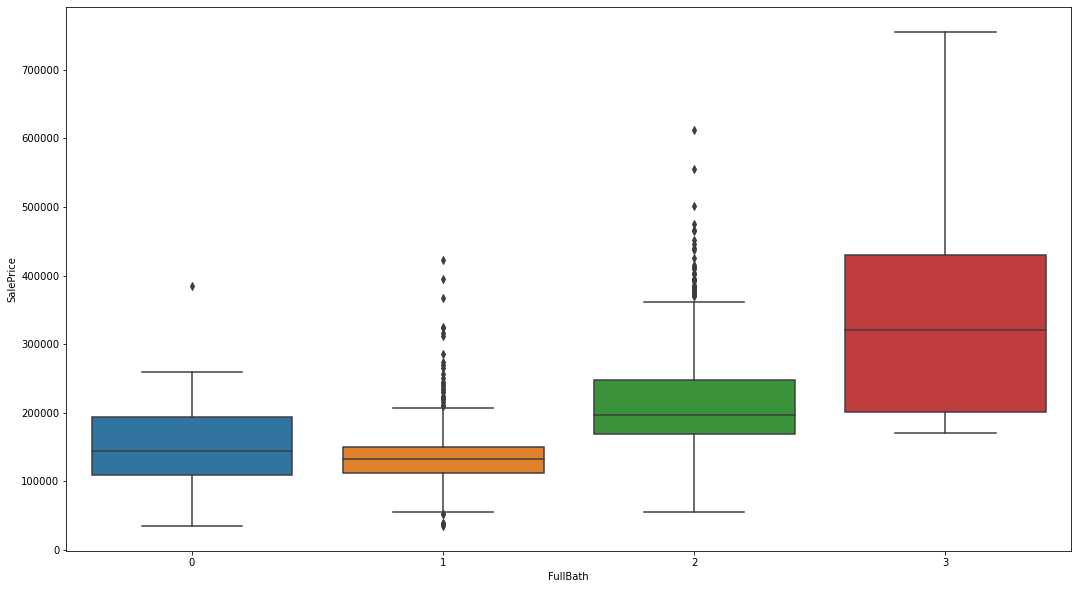

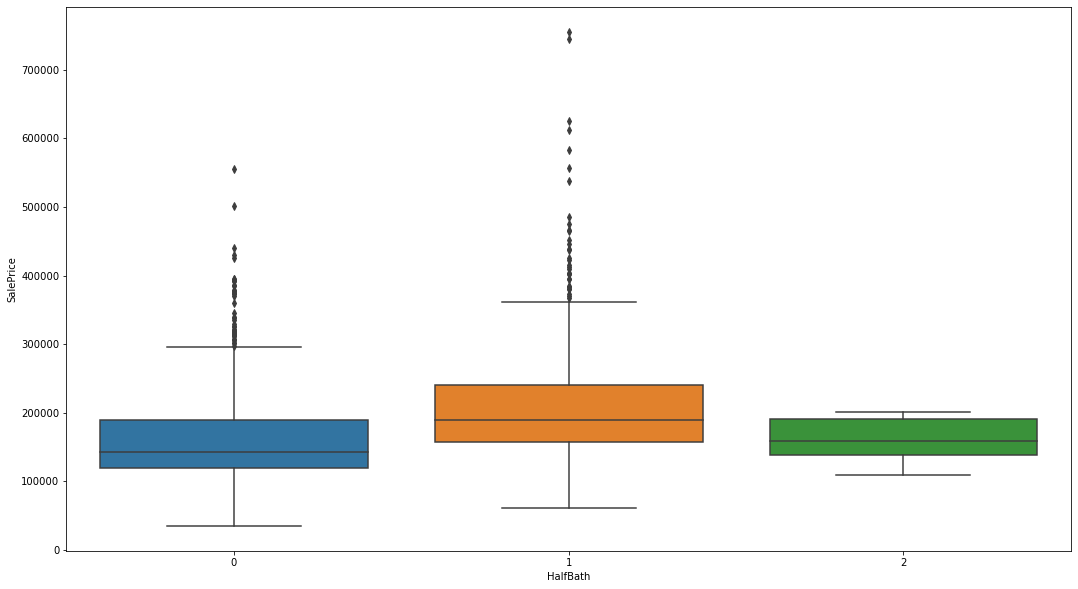

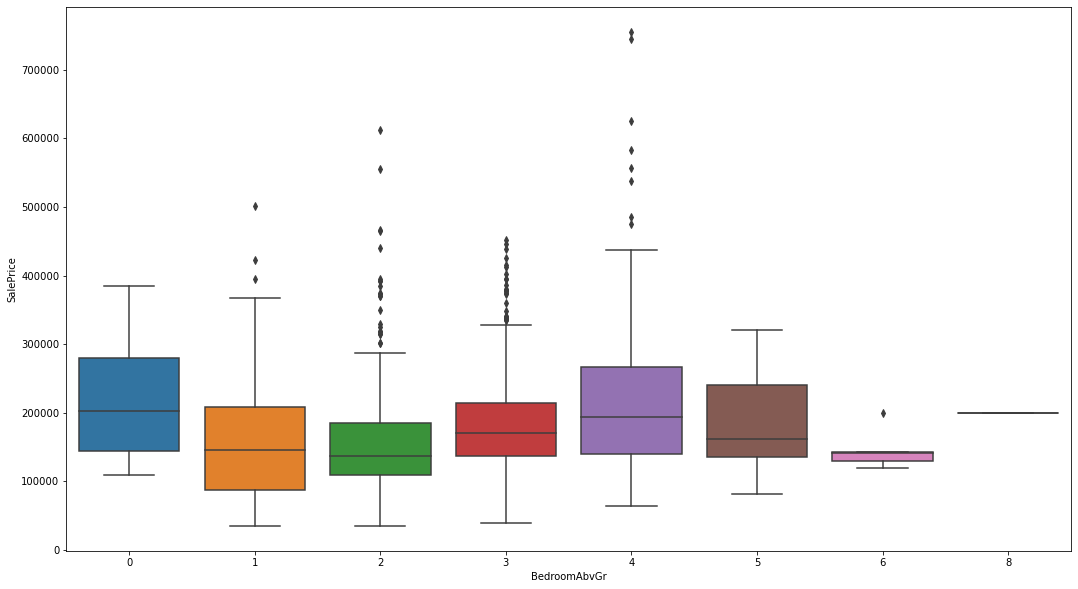

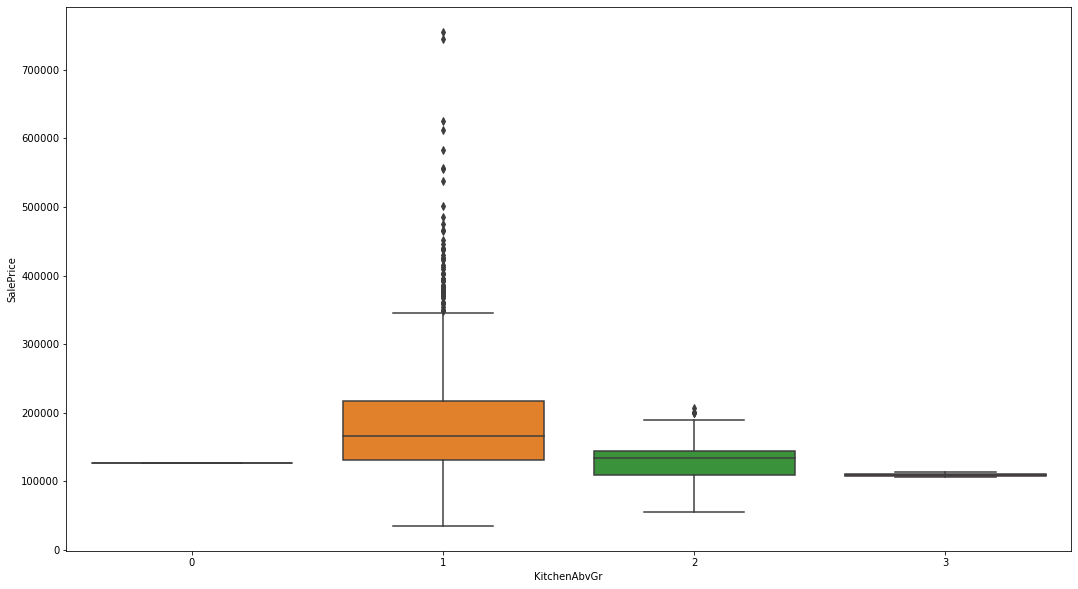

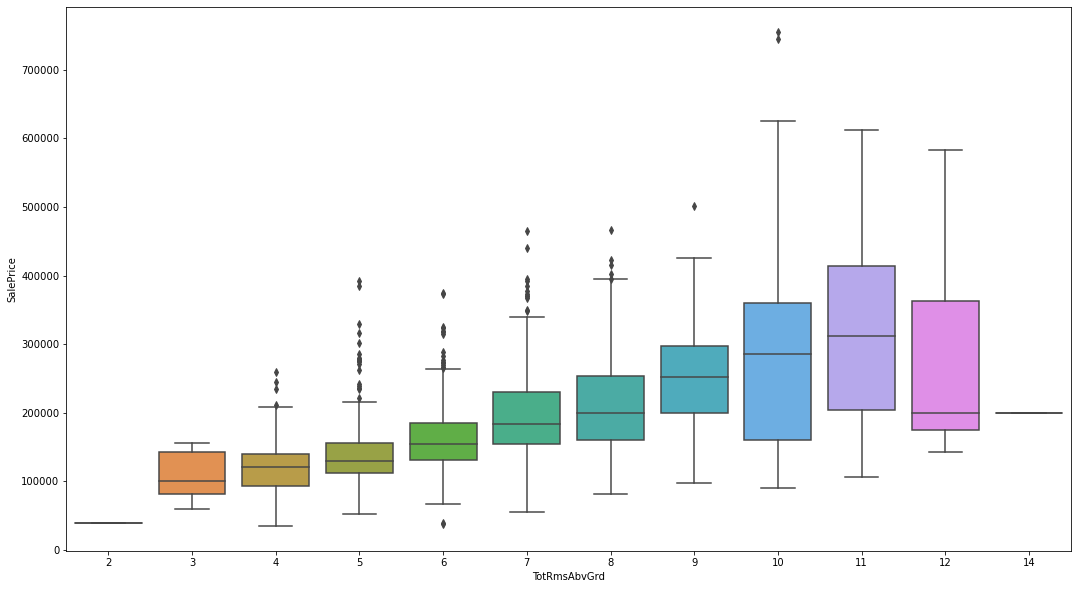

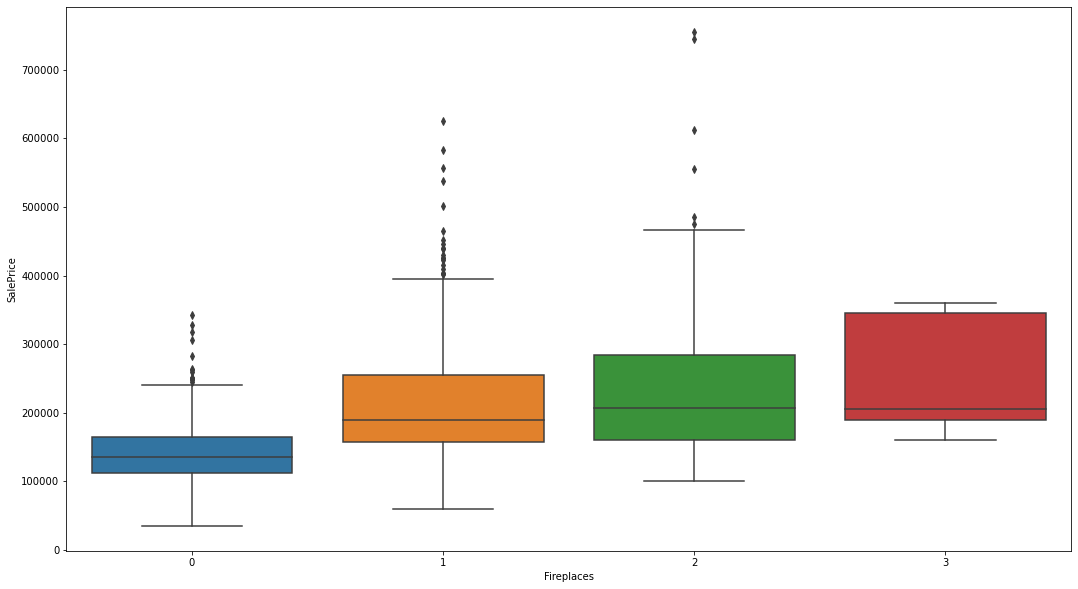

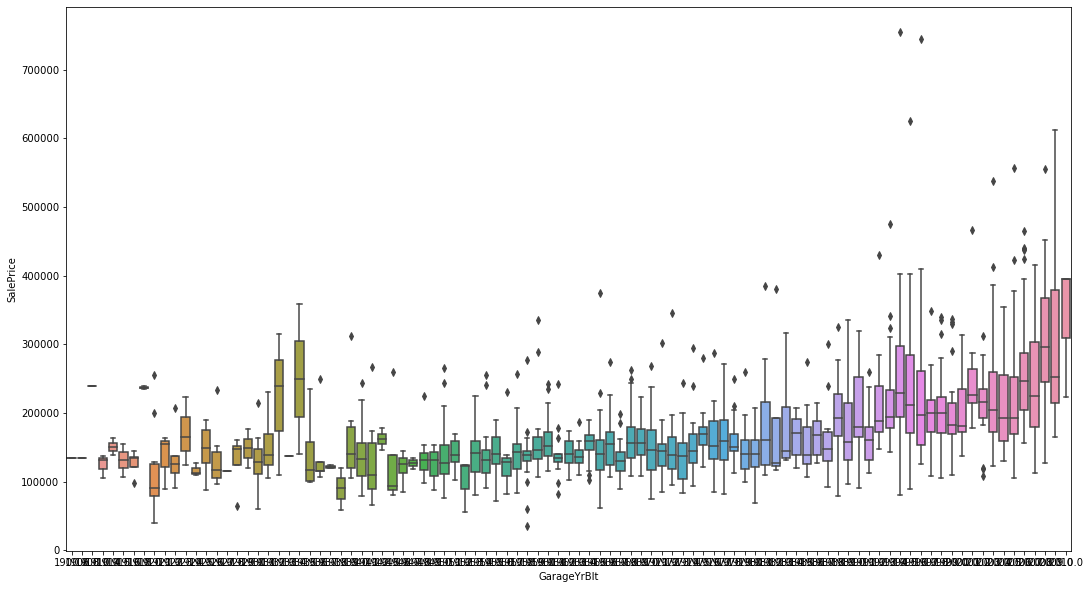

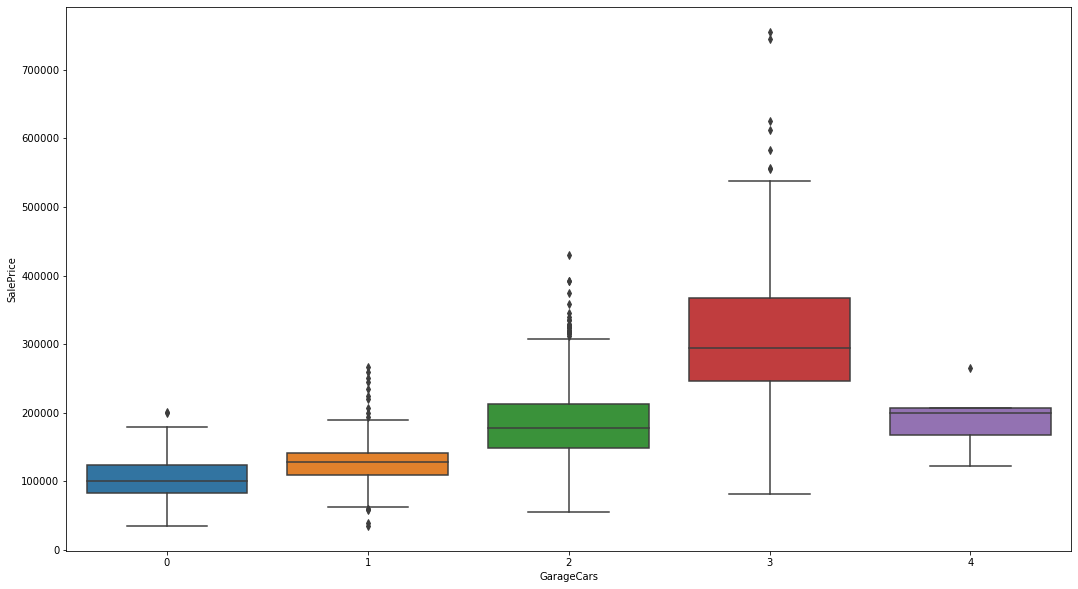

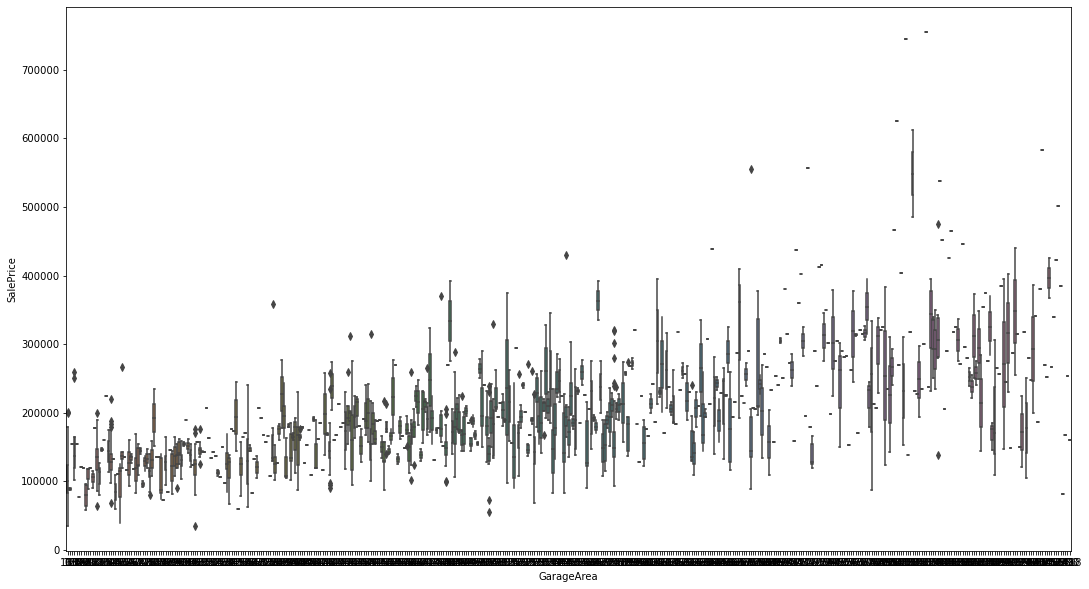

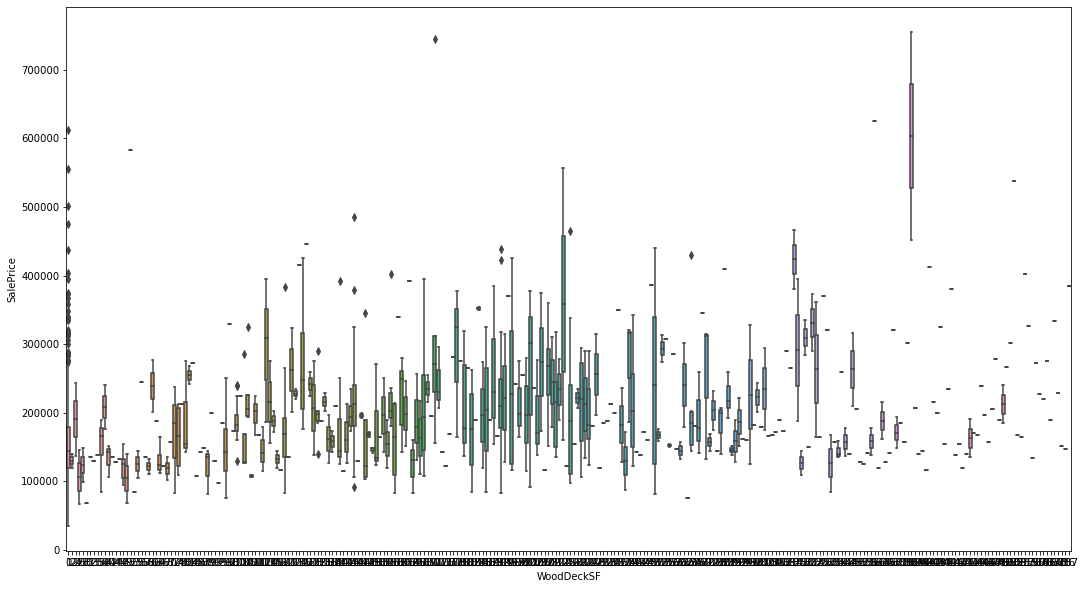

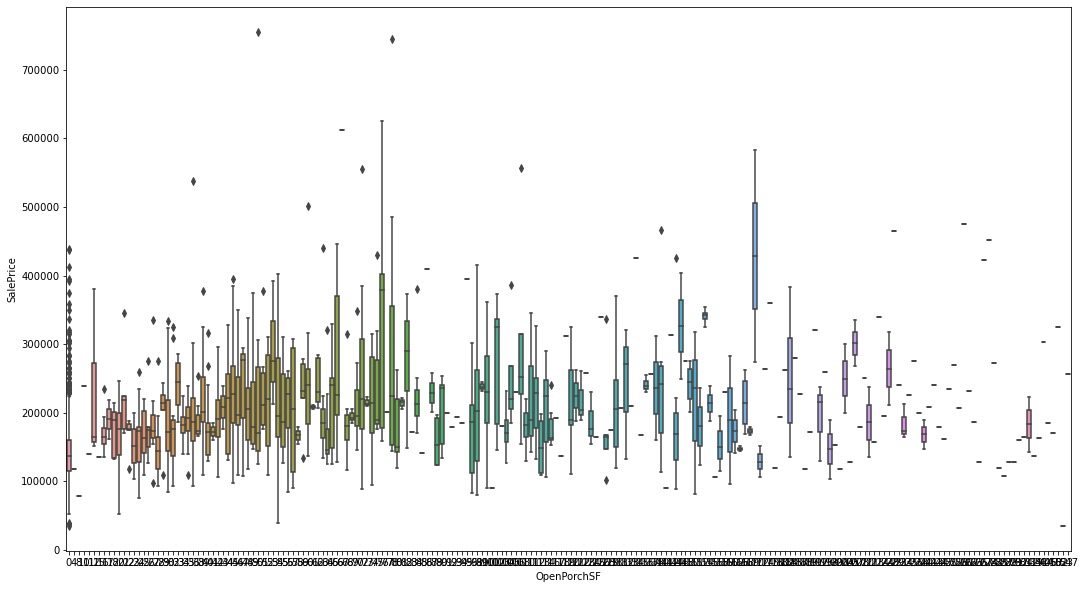

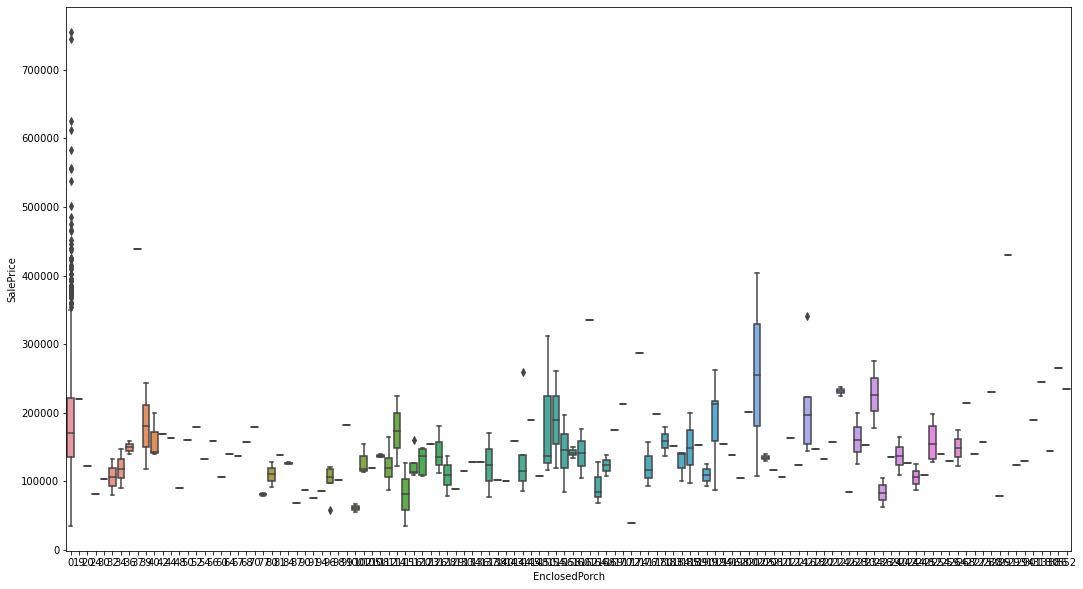

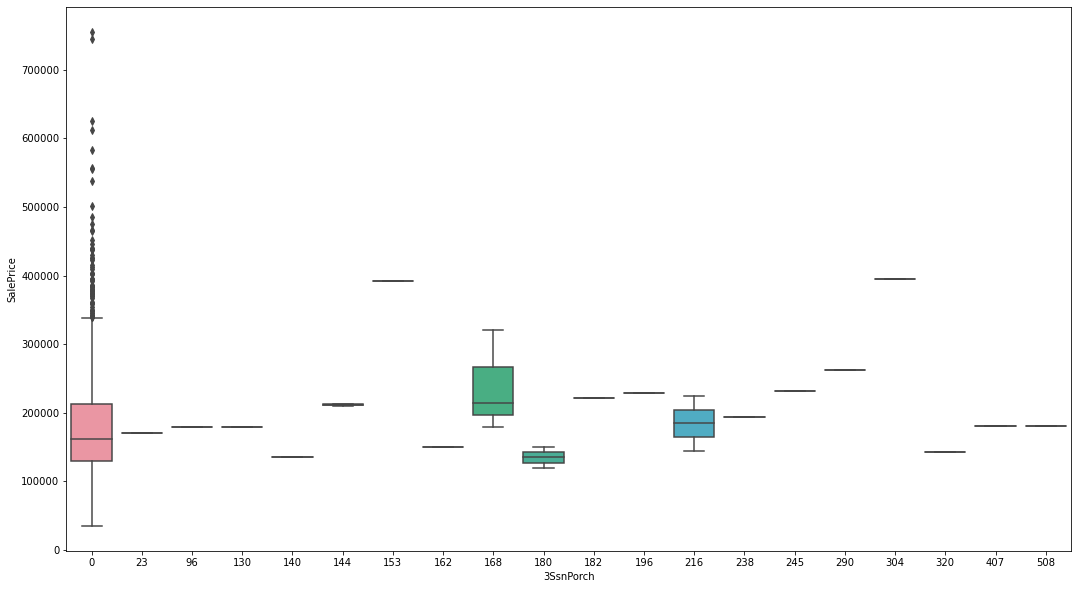

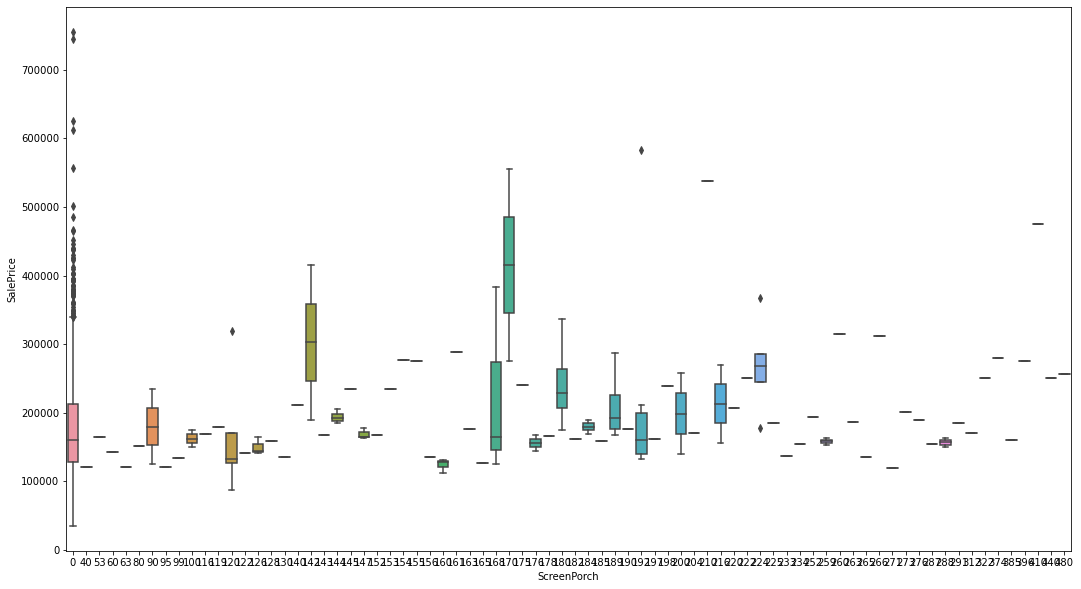

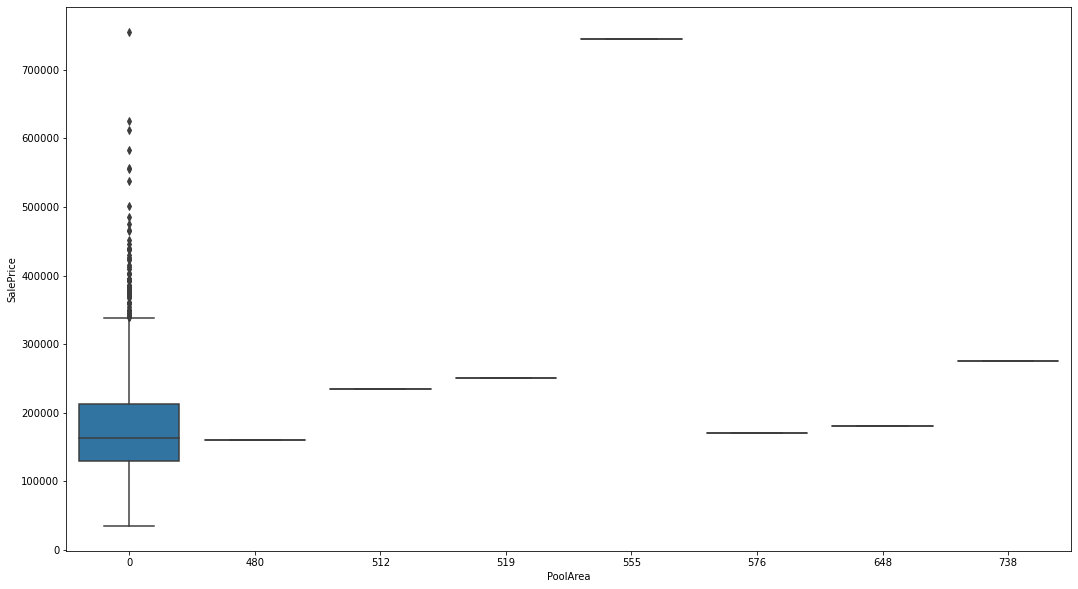

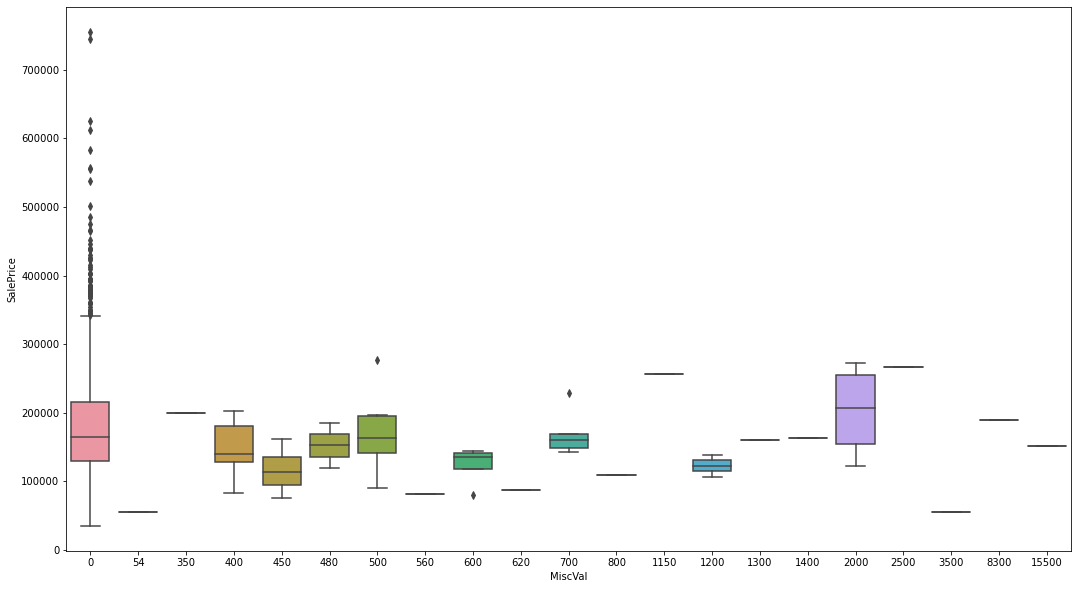

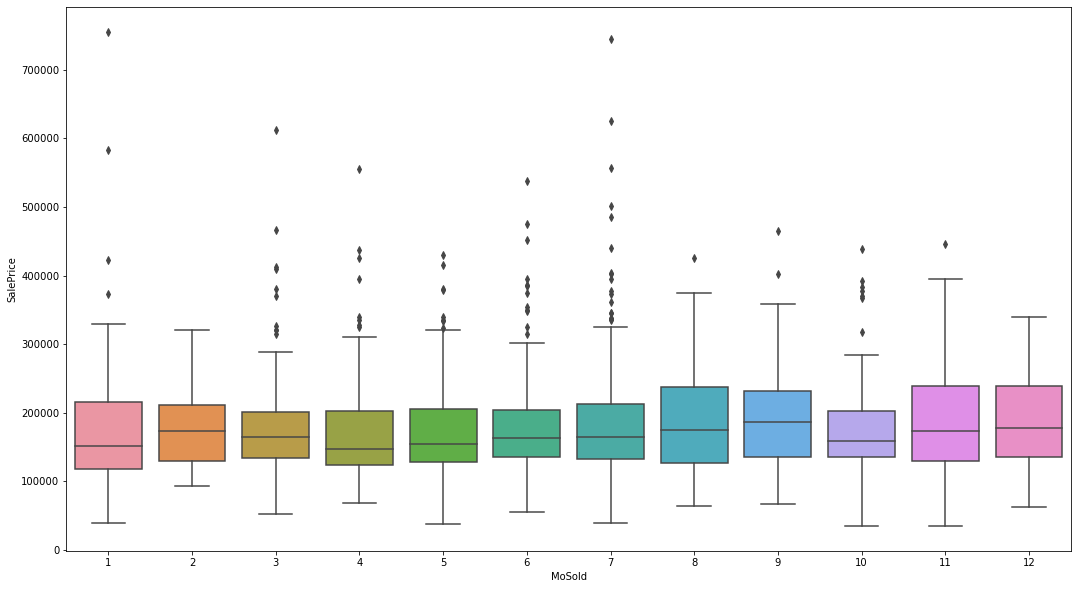

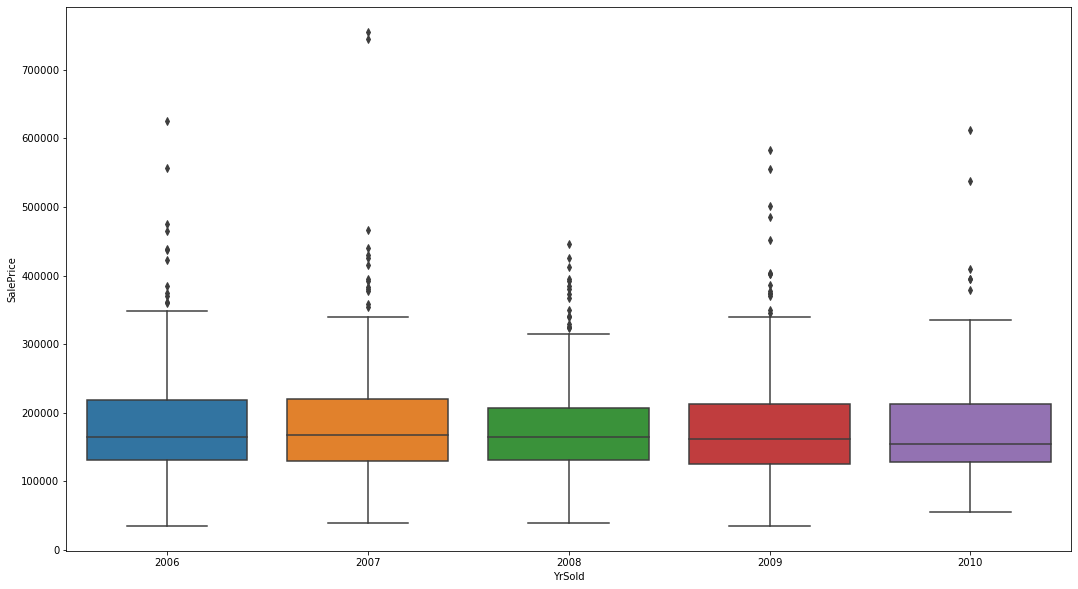

In [98]:
num_data = numericalData.drop(['SalePrice'], axis = 1)
for var in num_data:
    plt.rcParams.update({'figure.max_open_warning': 0})
    f, ax = plt.subplots(figsize = (18, 10))
    fig = sns.boxplot(x = num_data[var], y = trainData['SalePrice'])

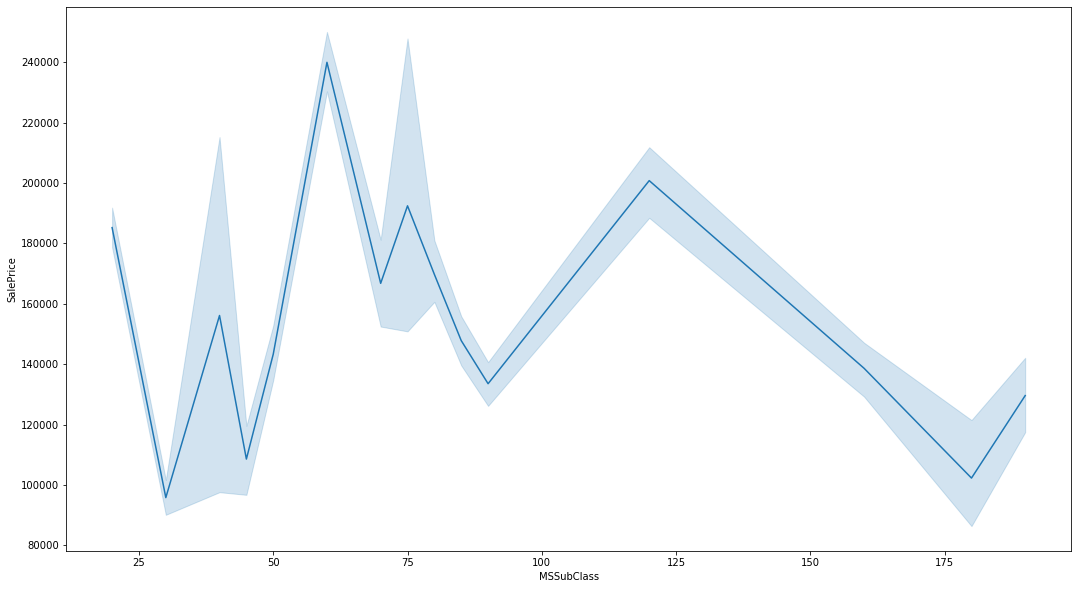

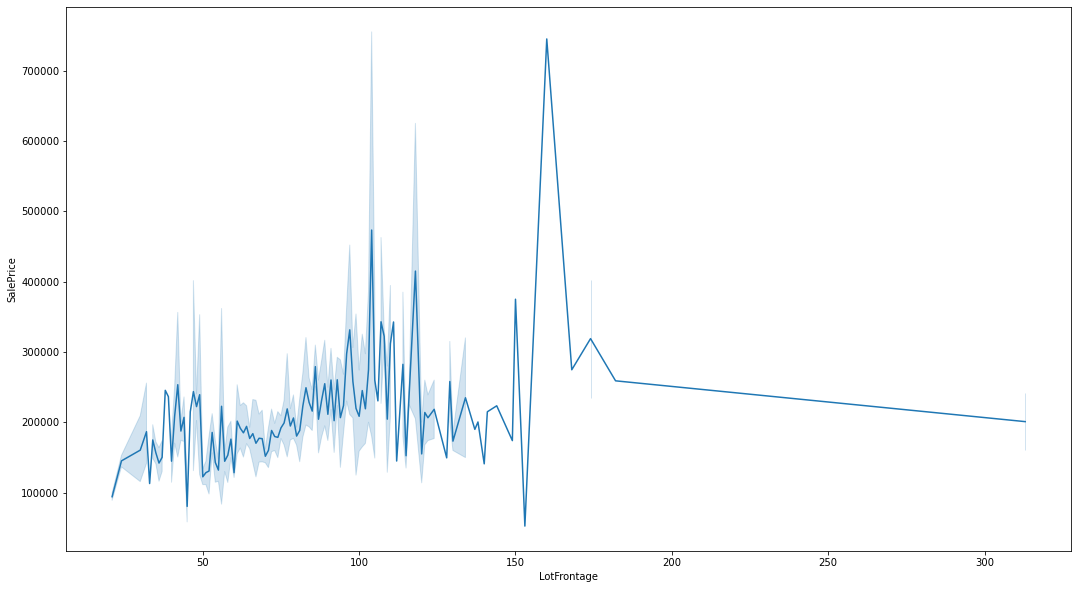

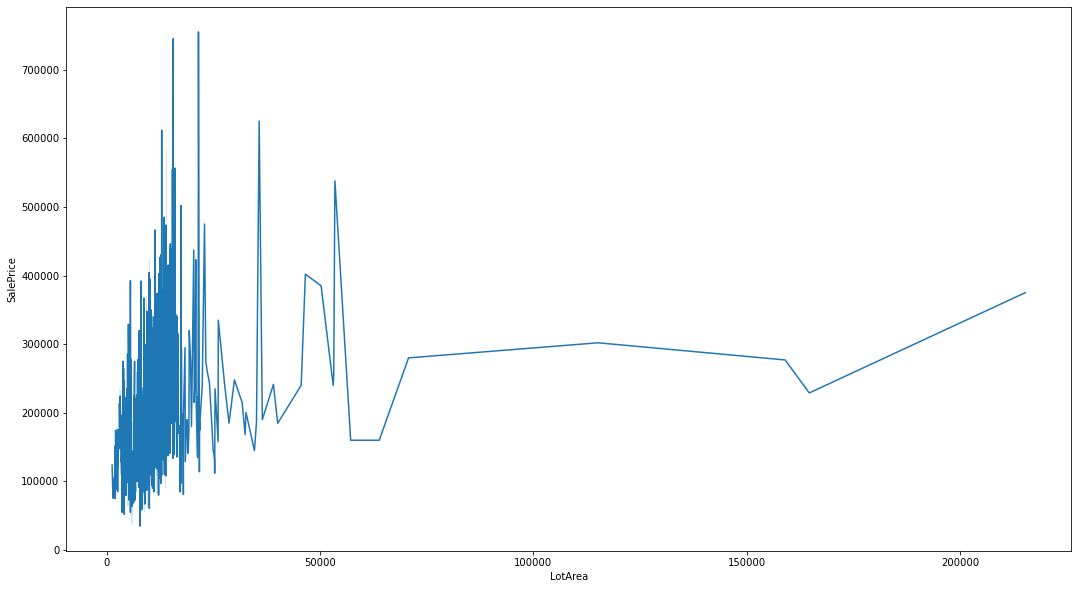

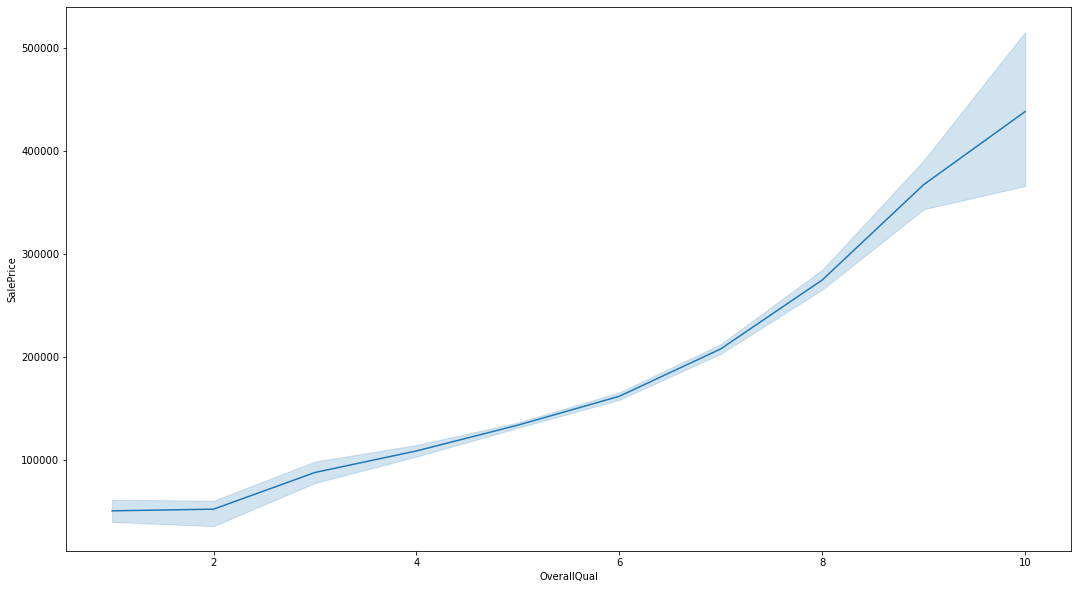

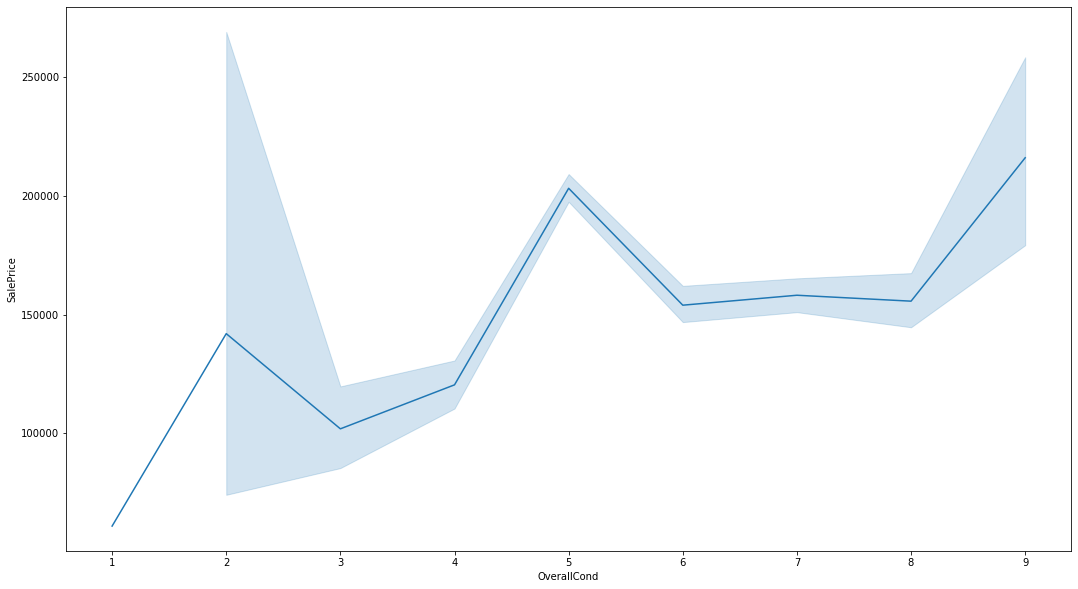

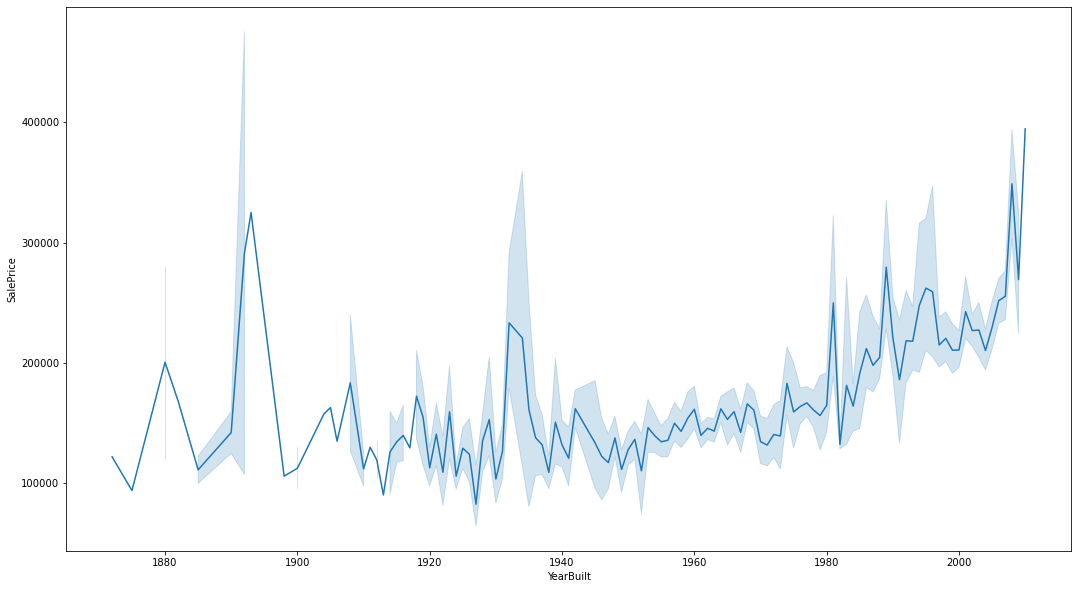

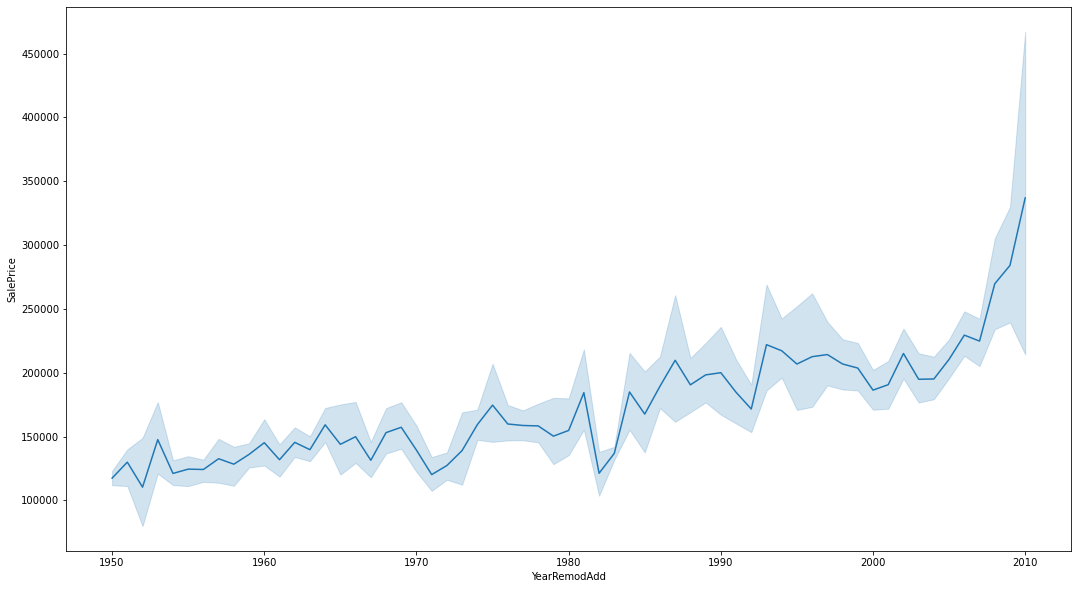

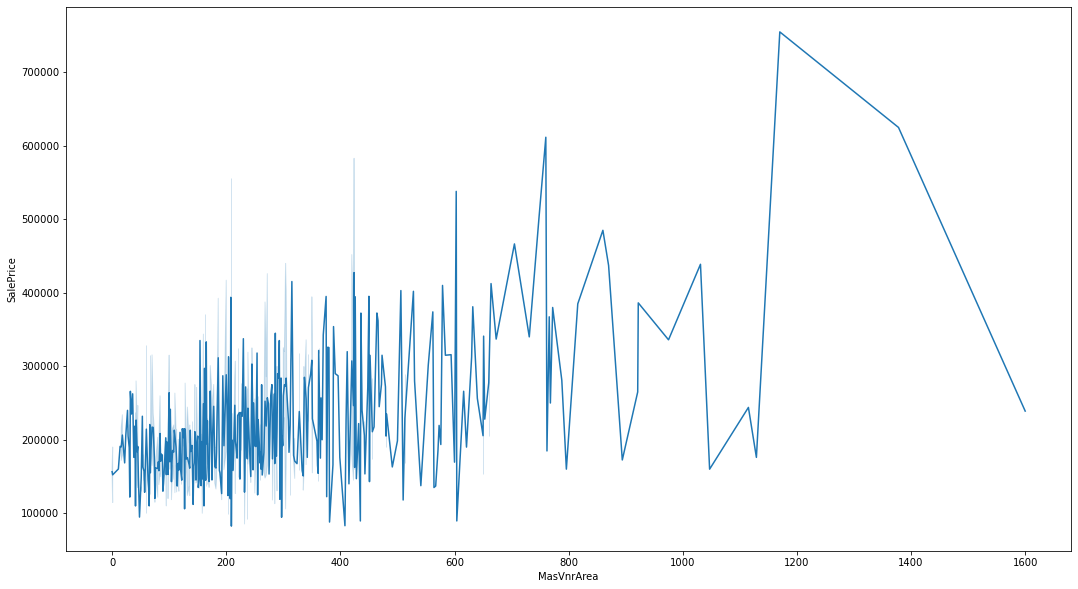

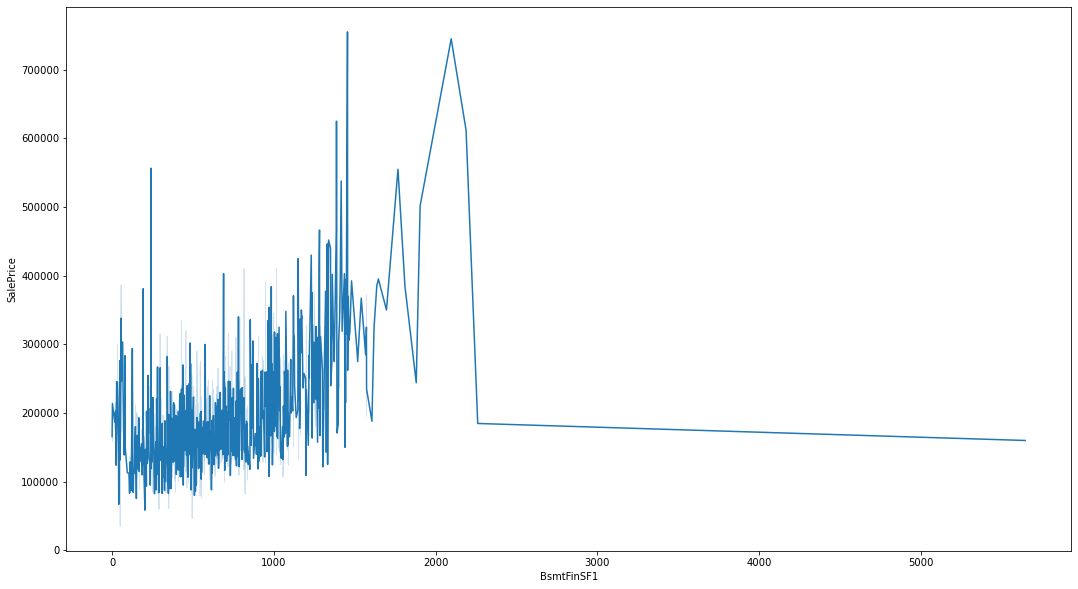

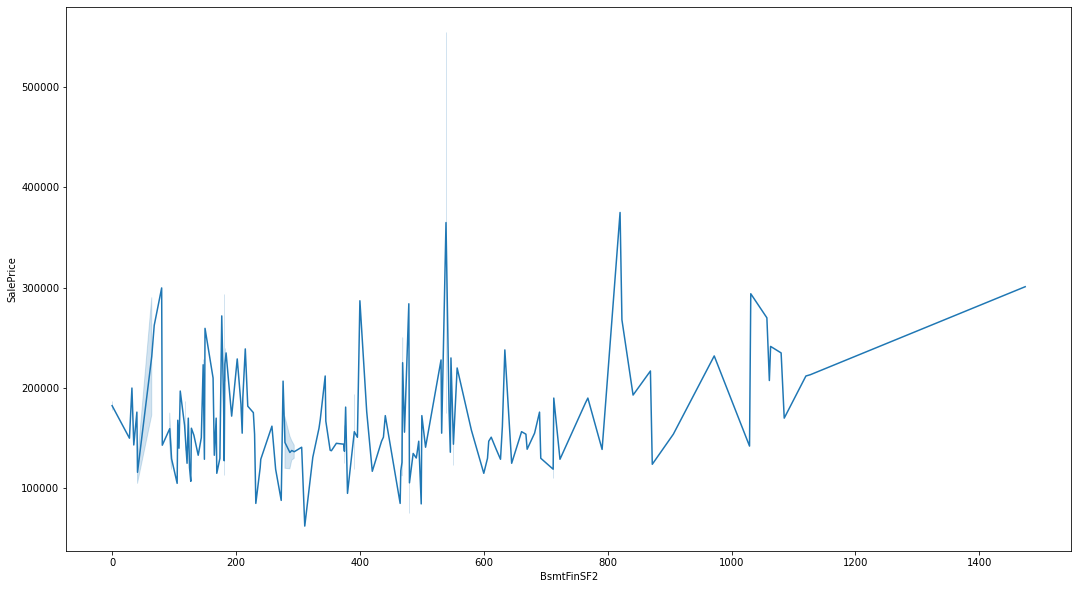

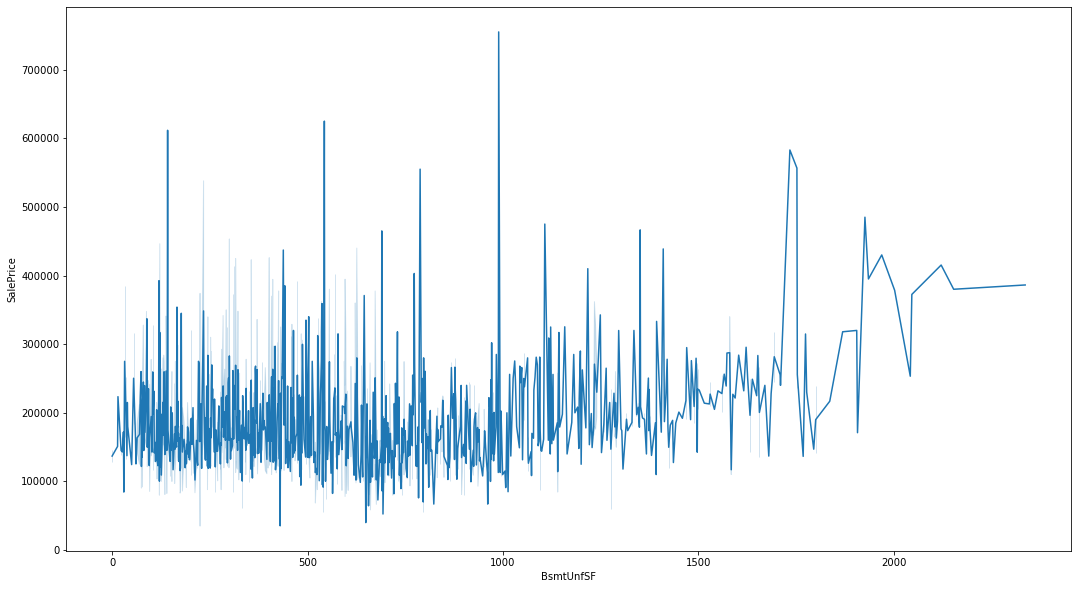

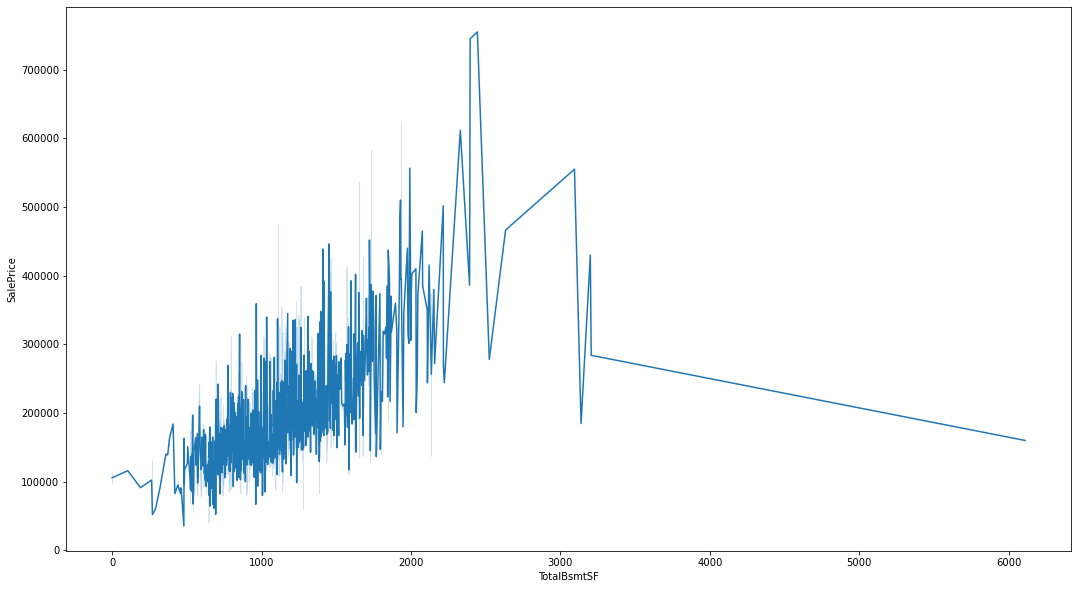

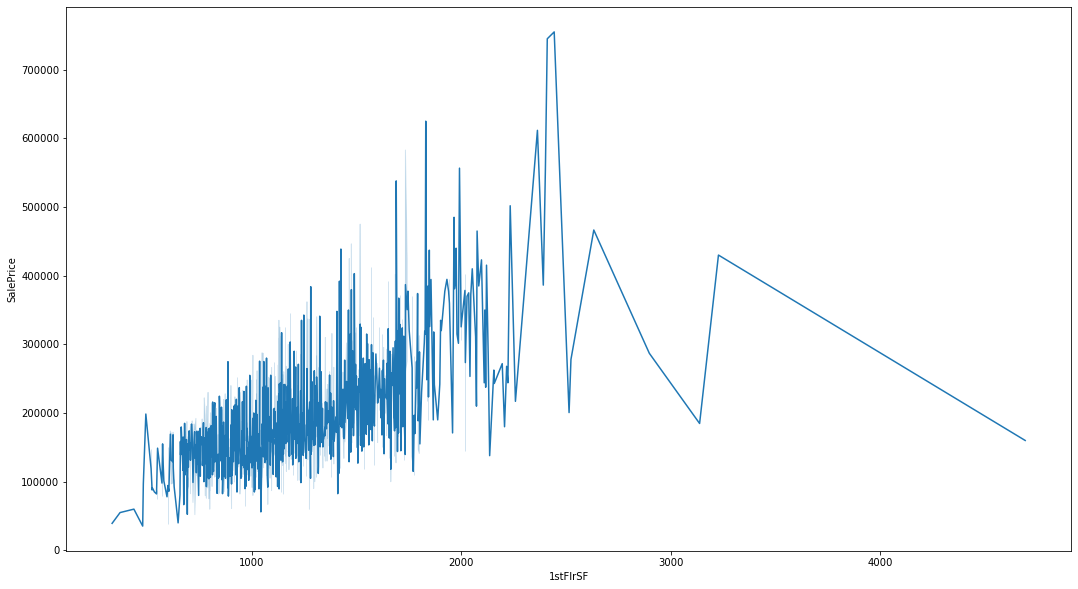

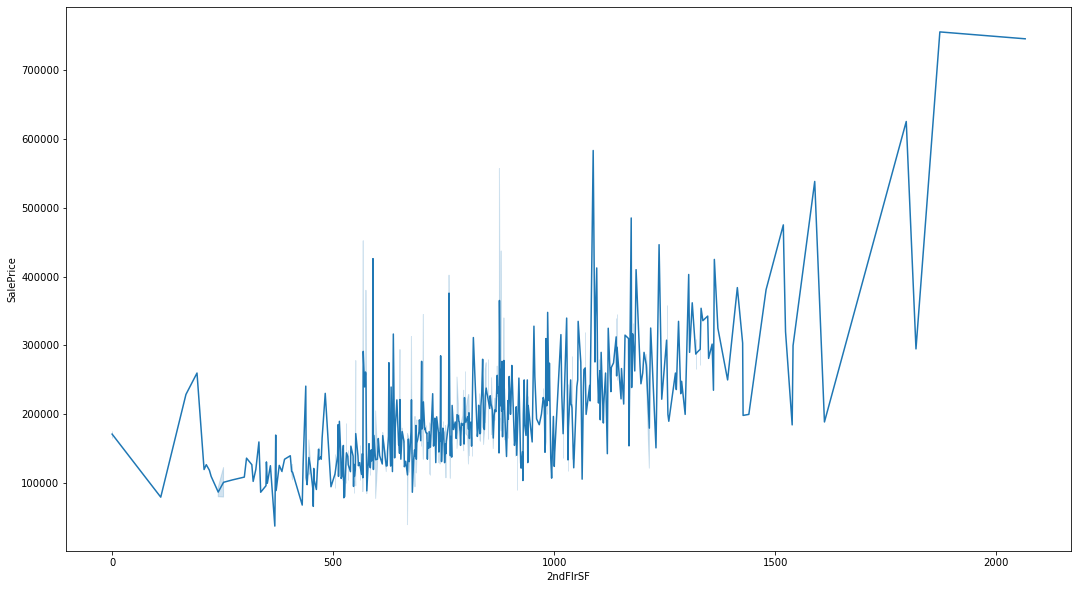

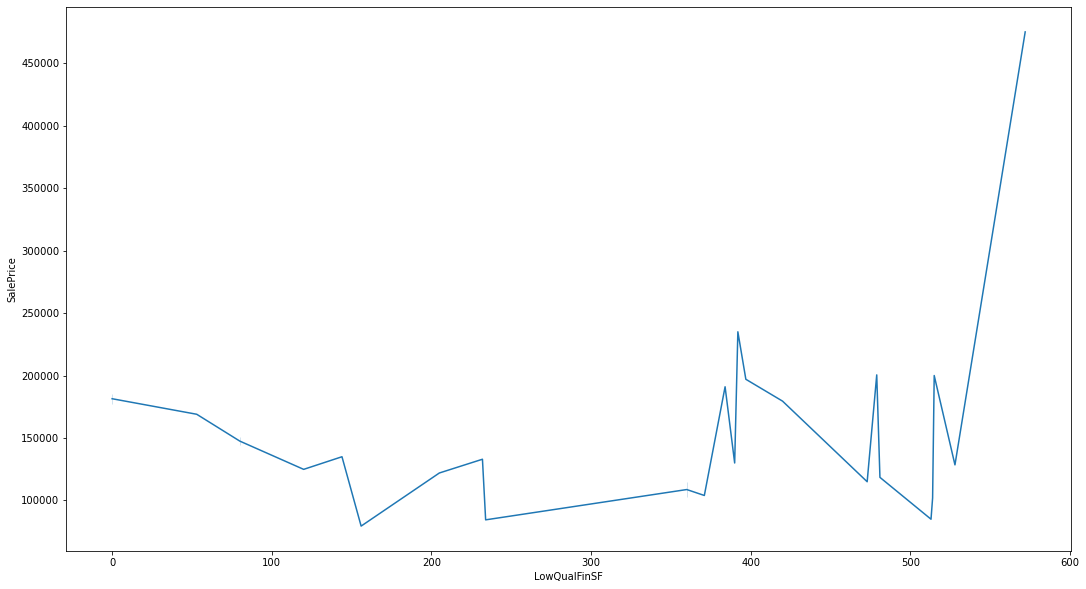

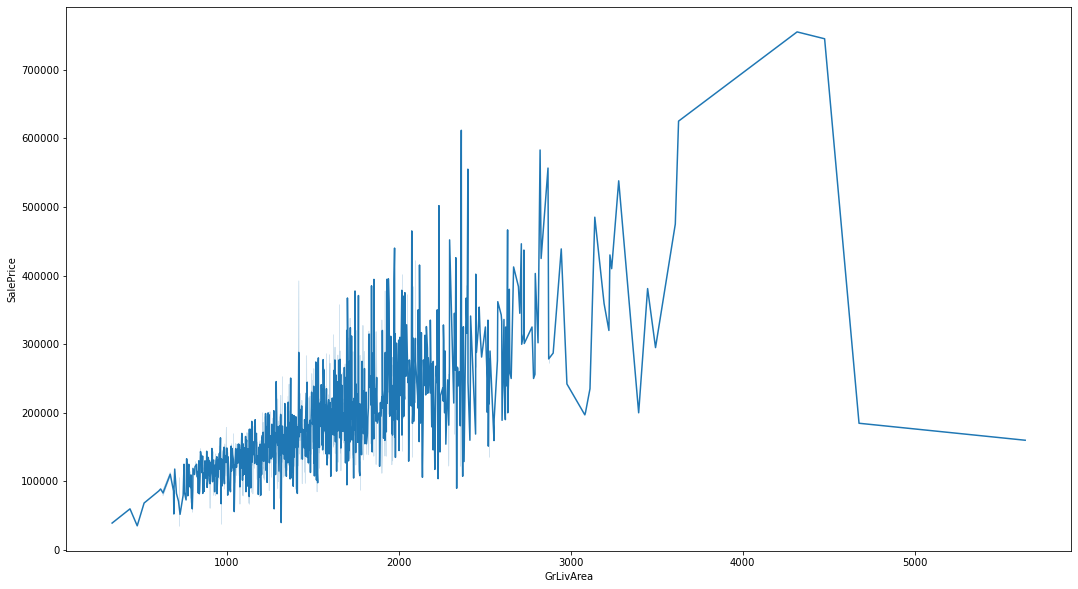

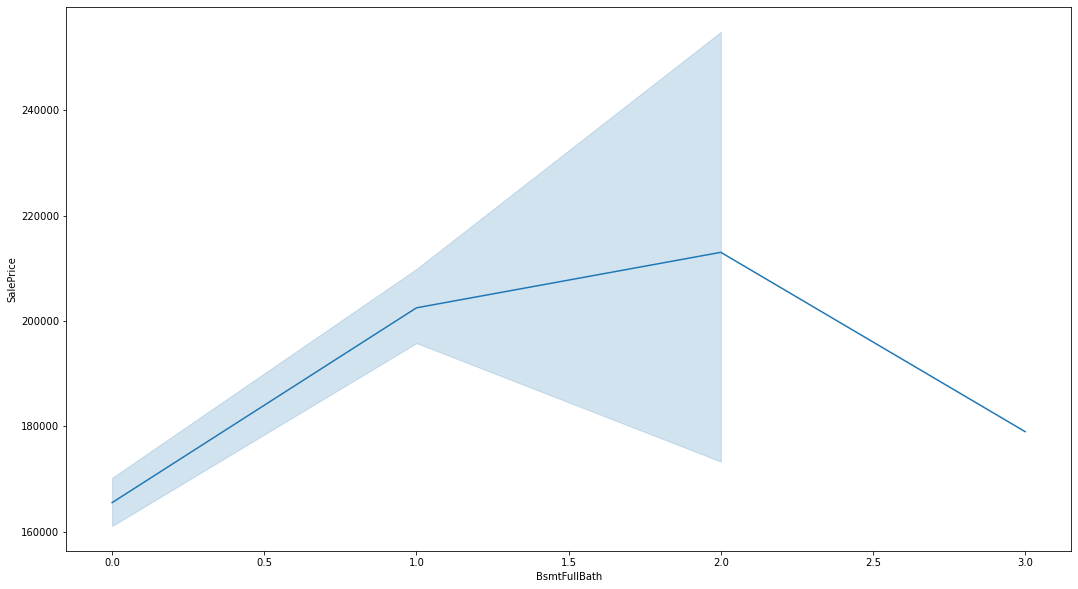

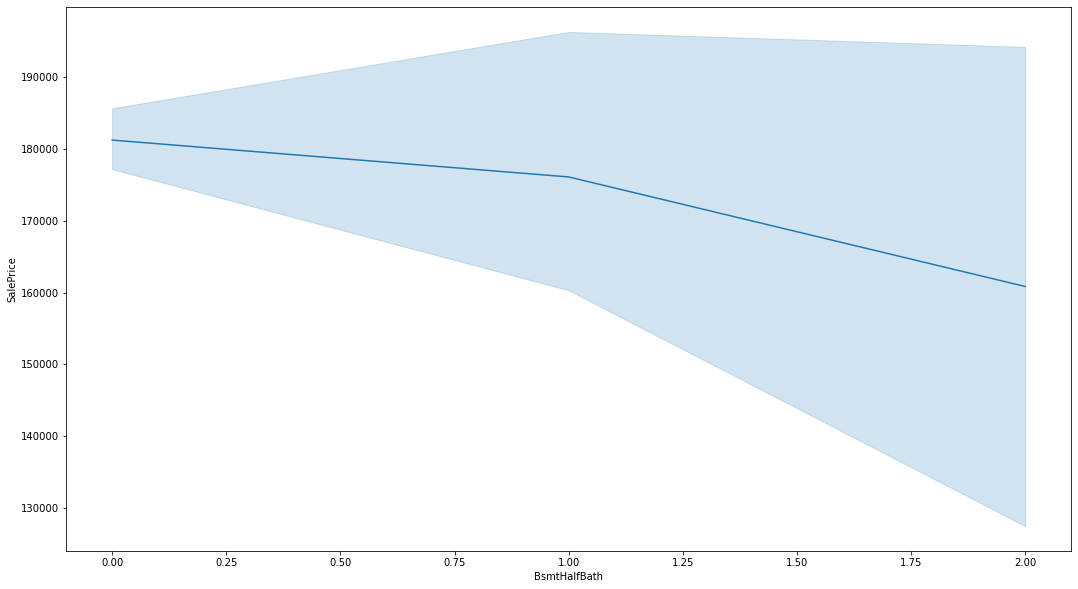

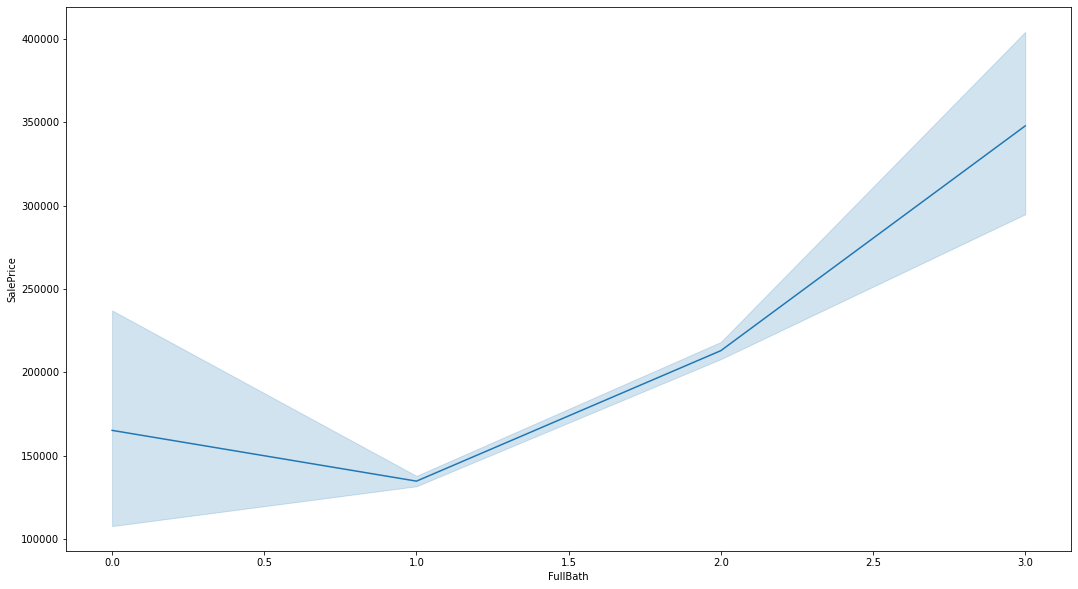

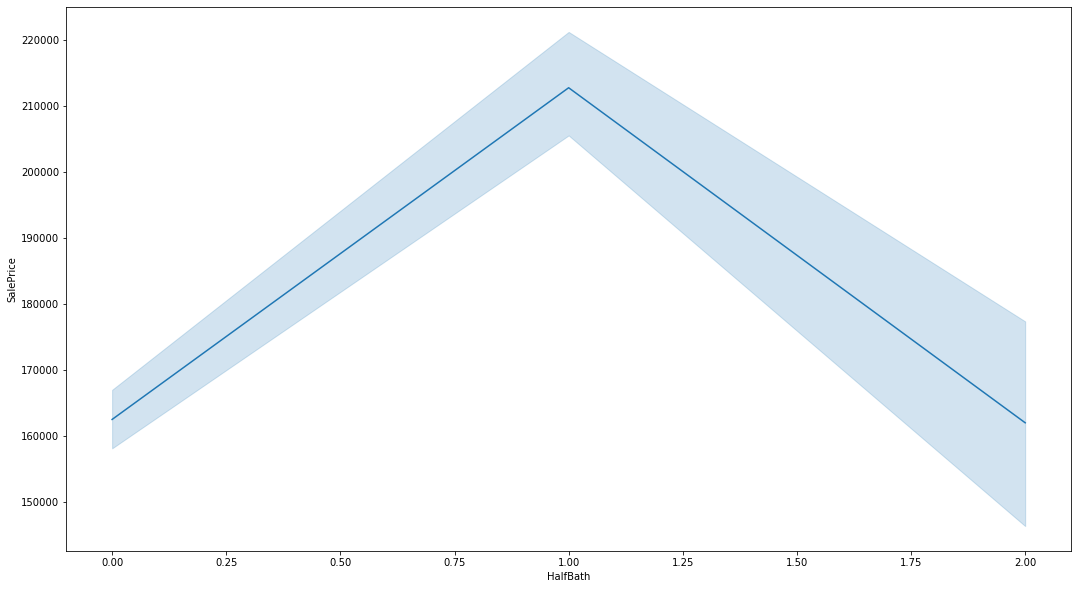

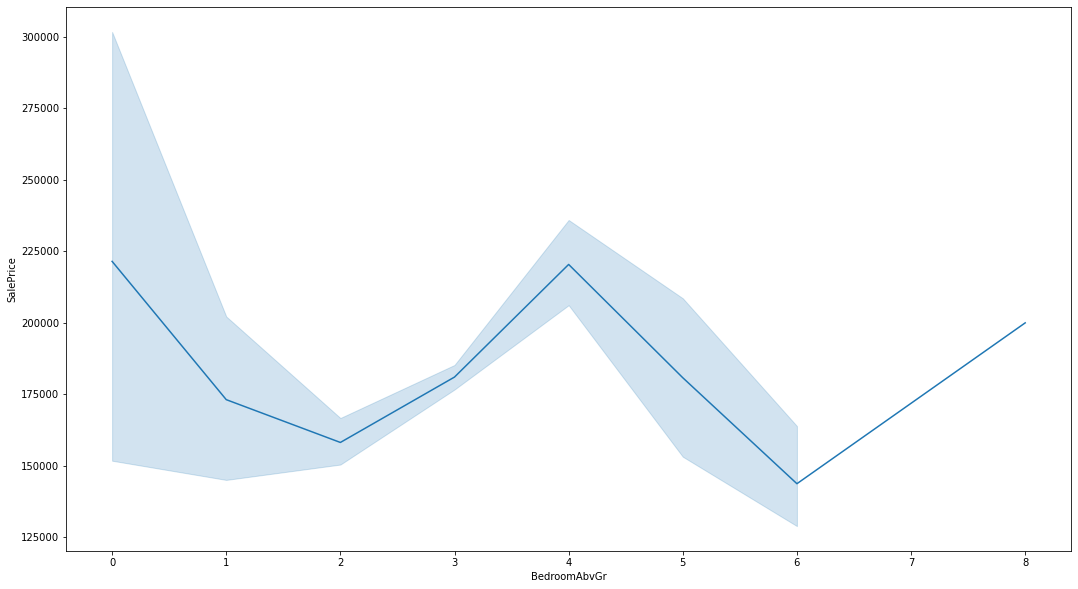

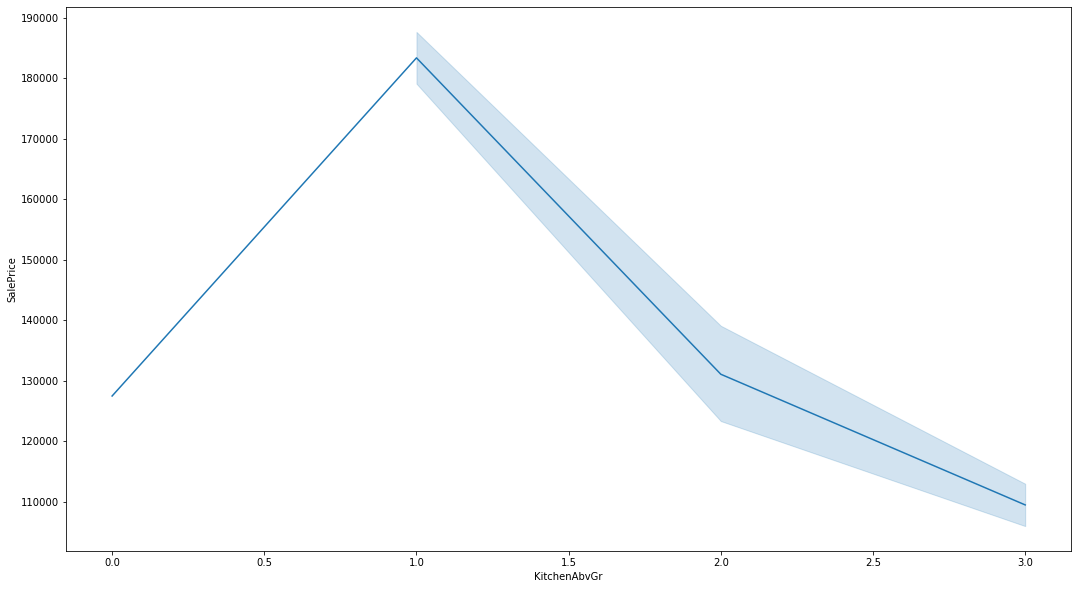

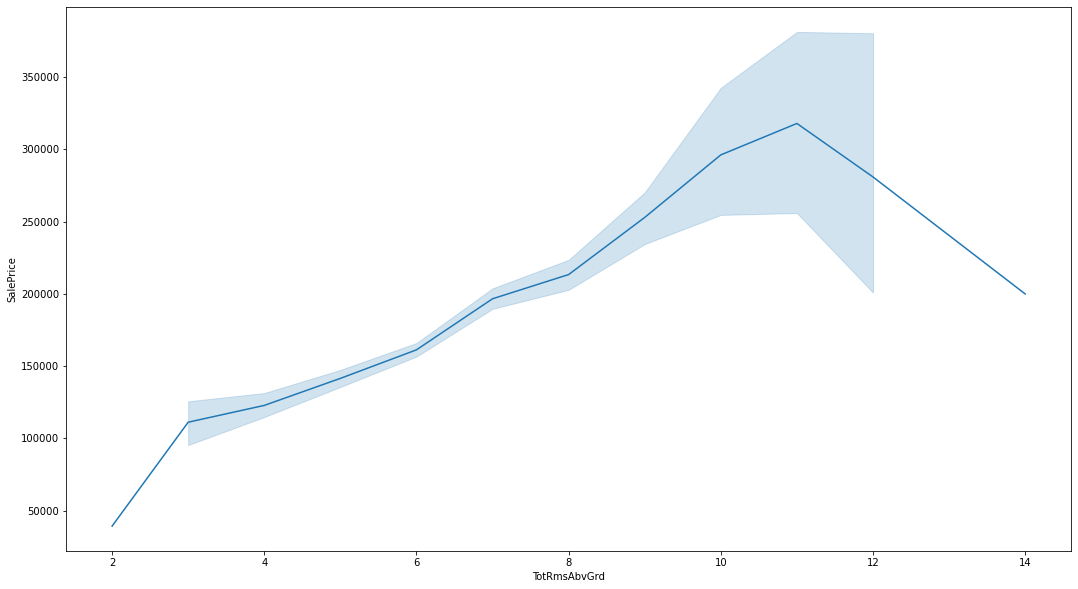

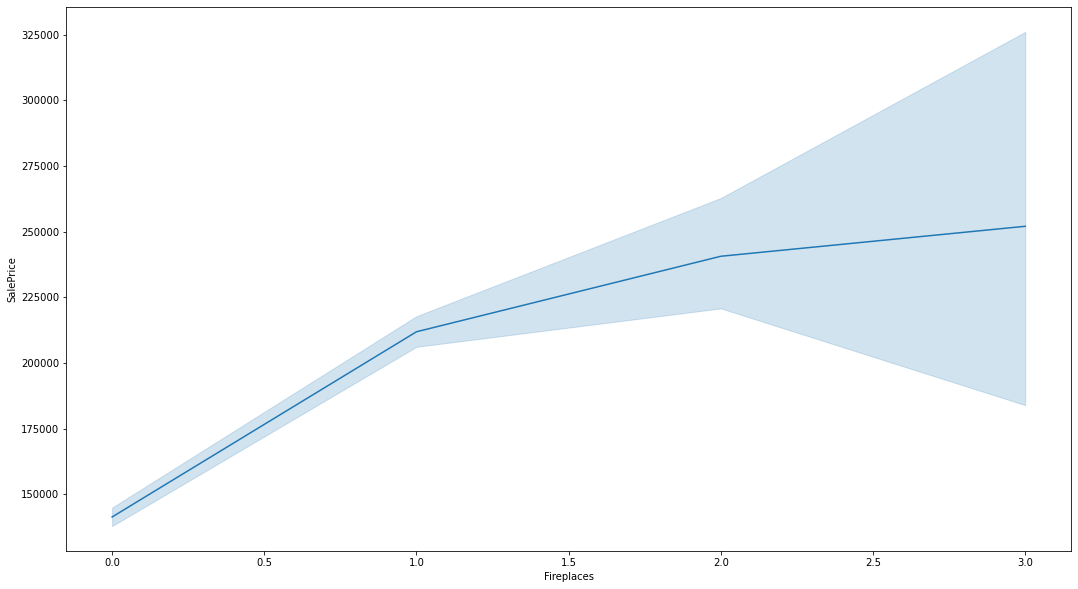

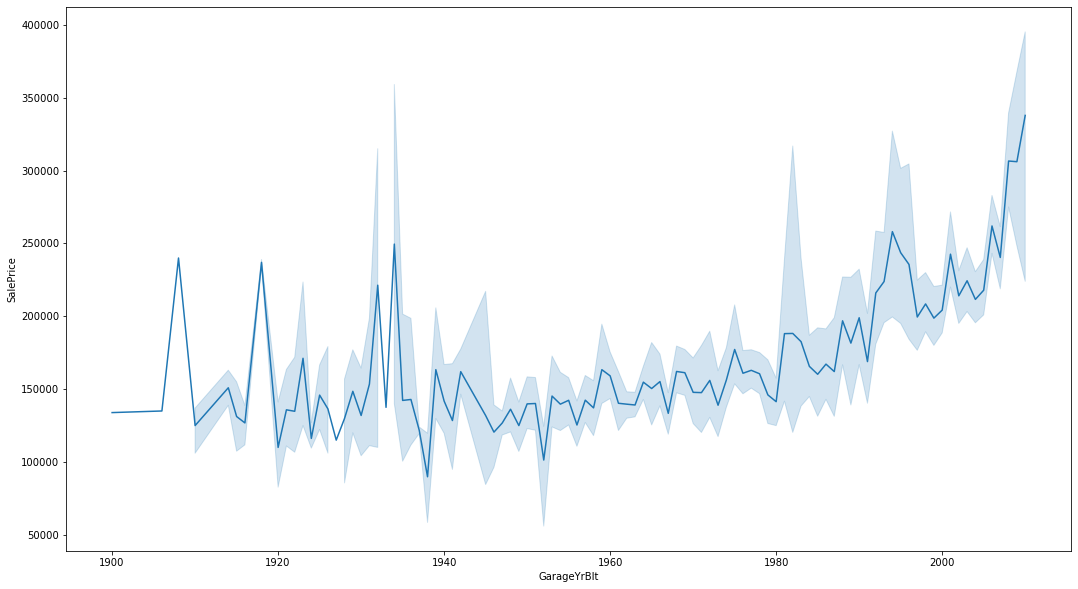

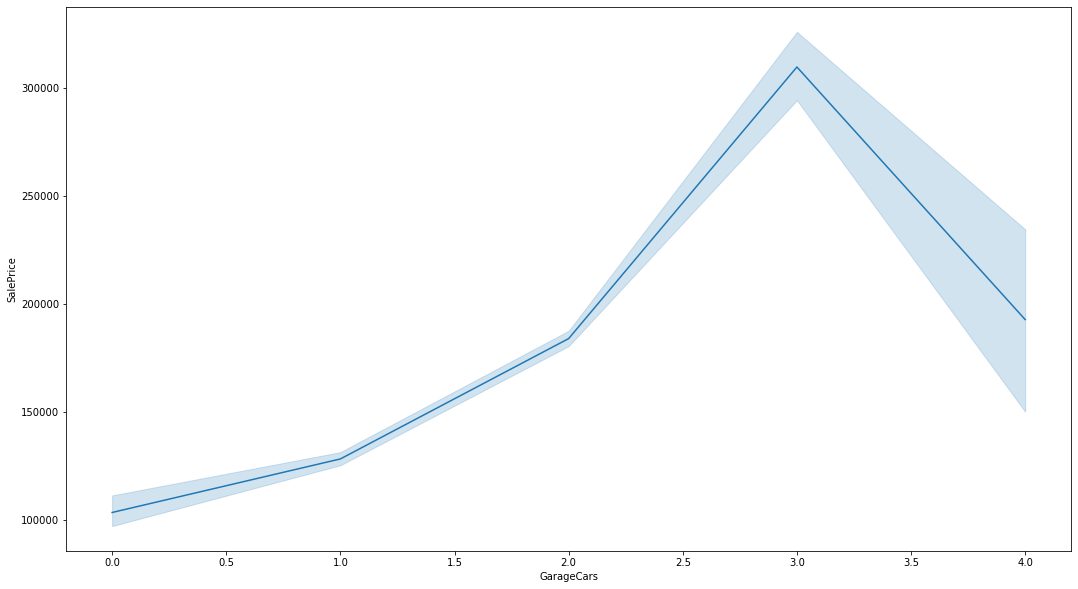

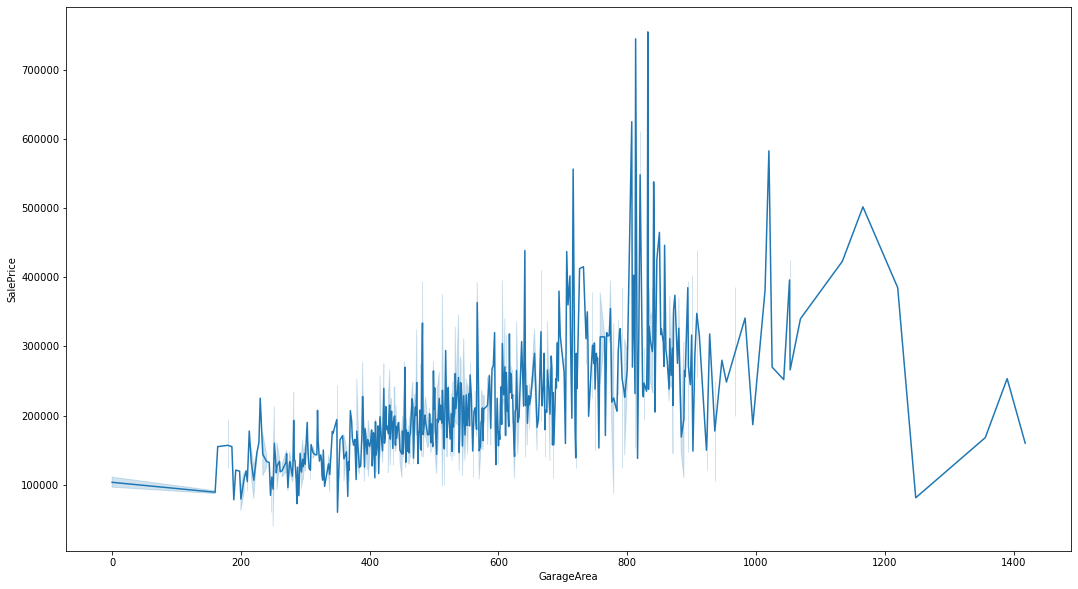

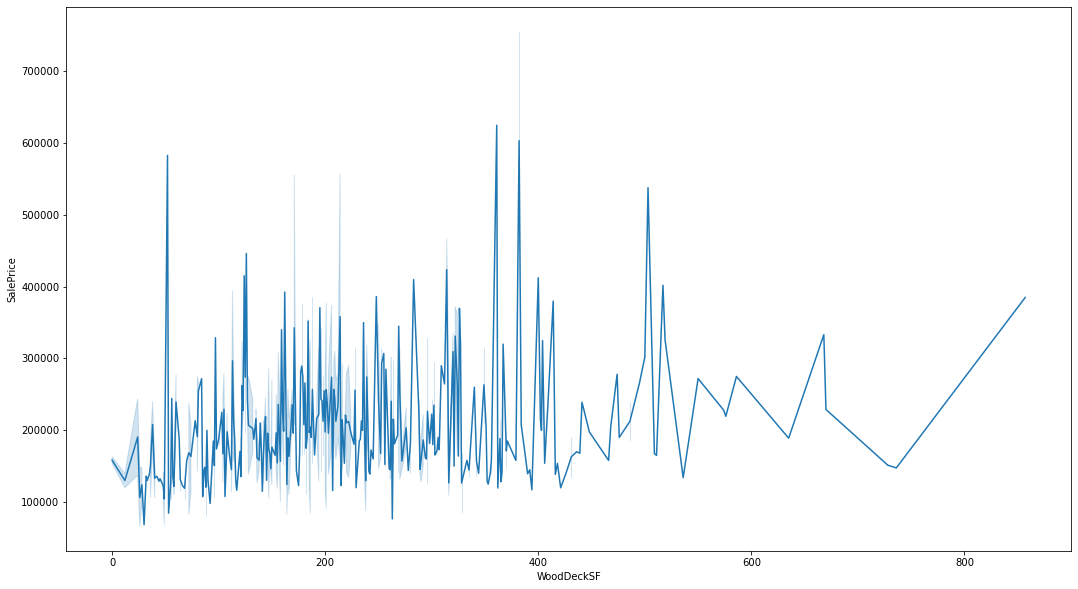

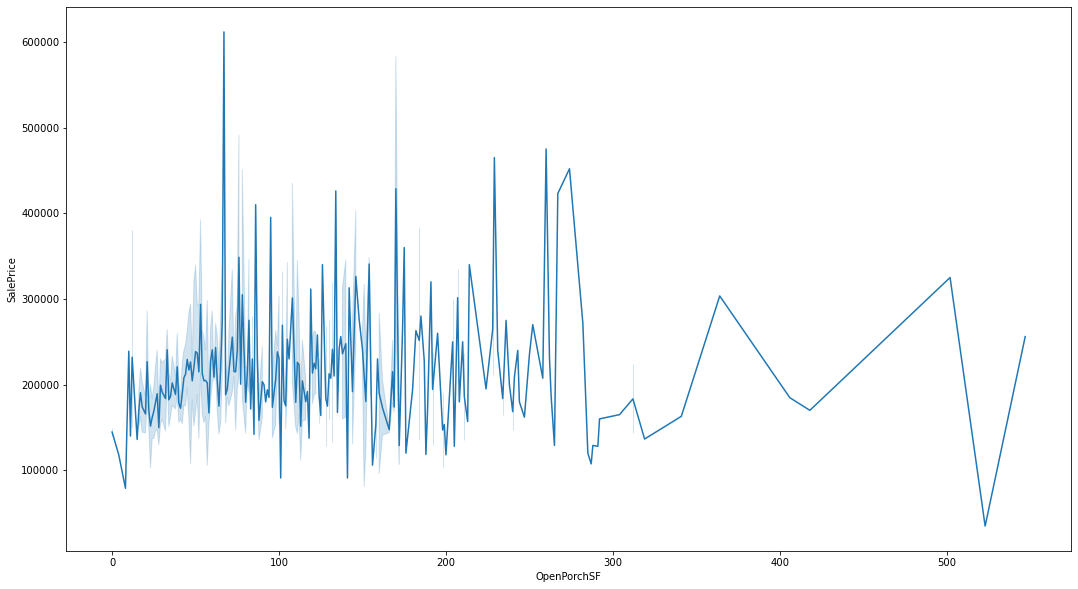

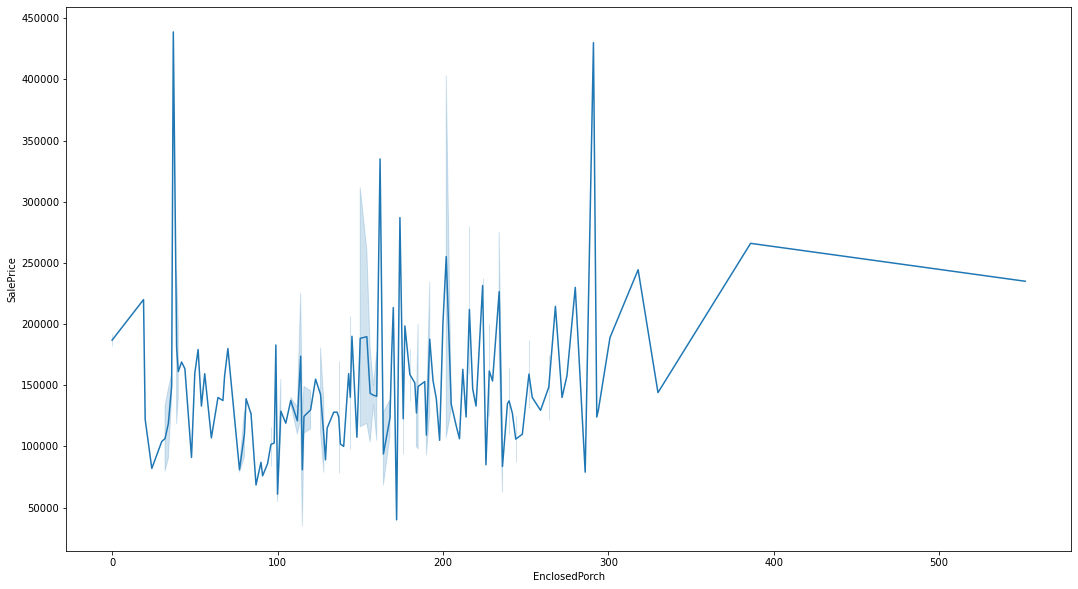

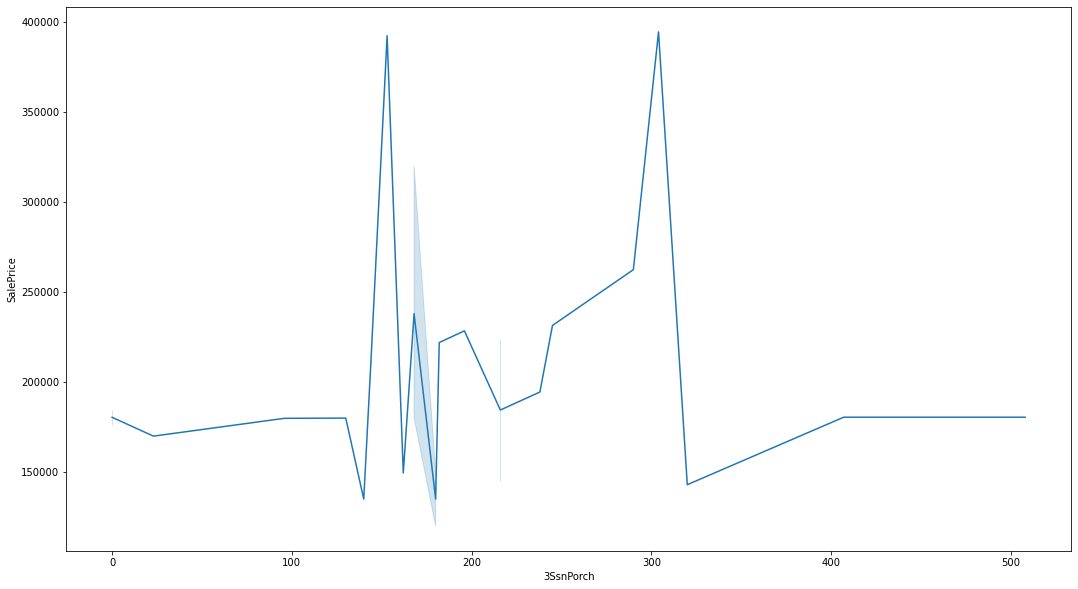

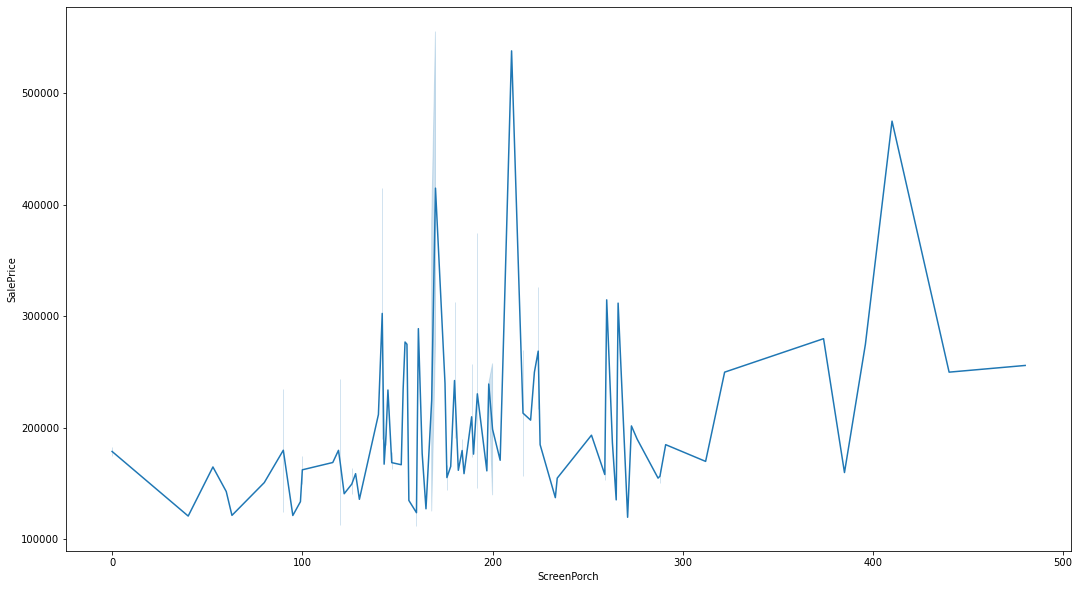

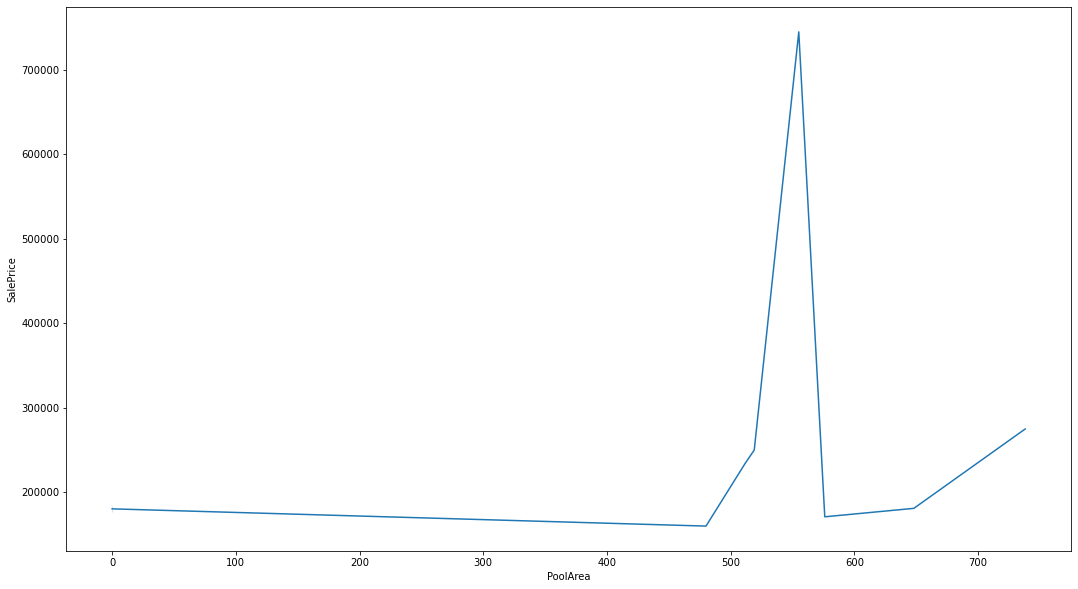

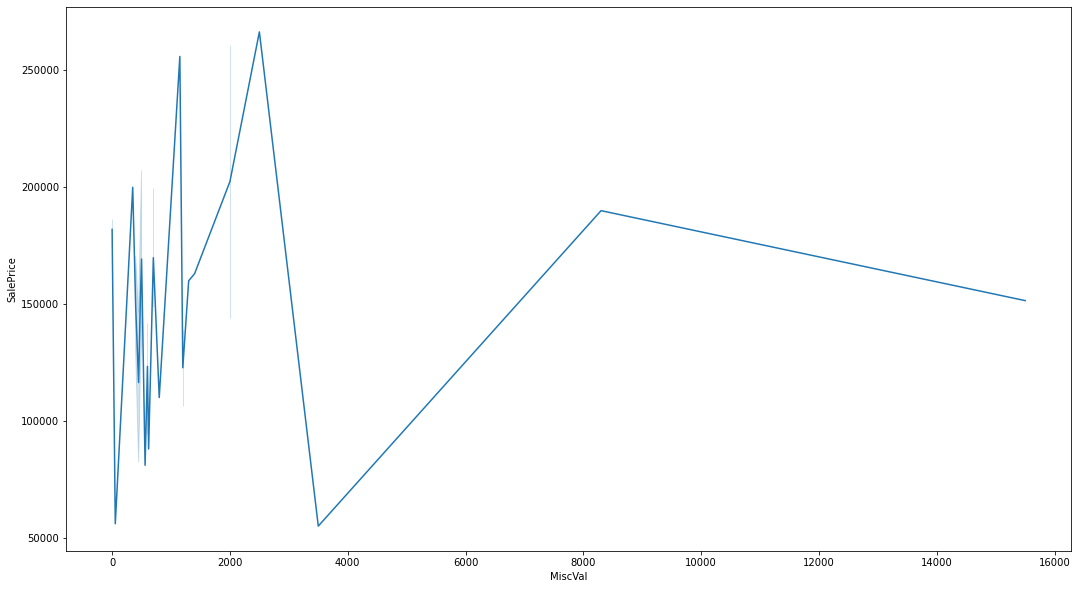

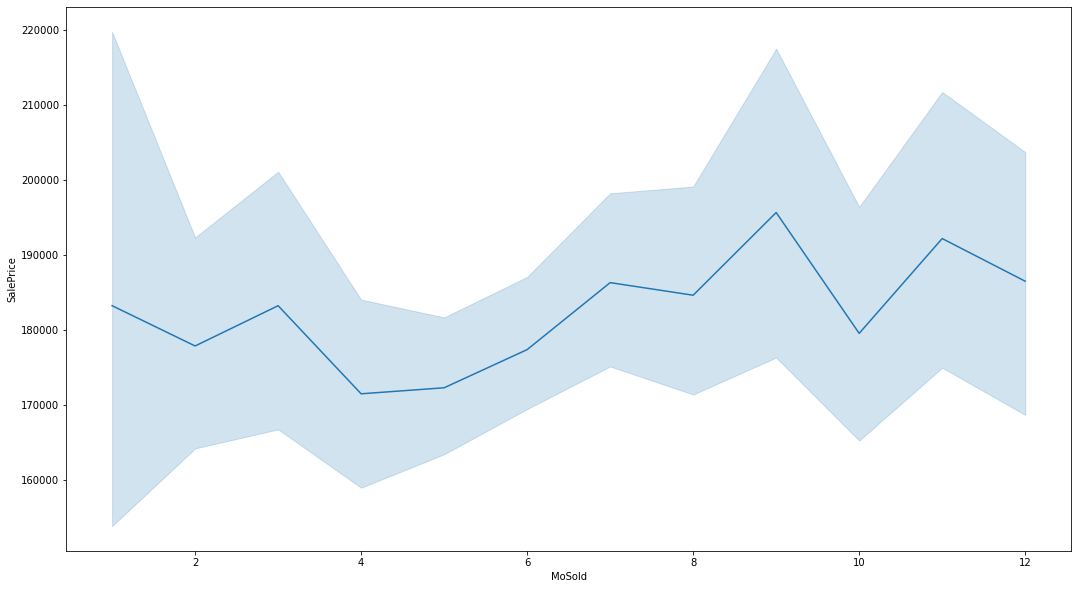

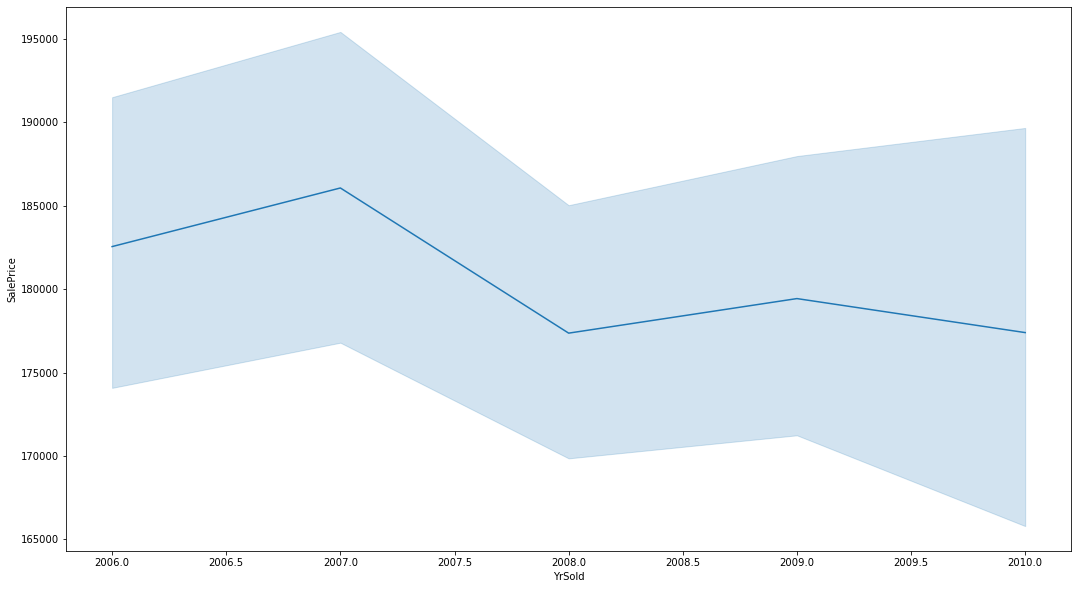

In [100]:
num_data = numericalData.drop(['SalePrice'], axis = 1)
for var in num_data:
    plt.rcParams.update({'figure.max_open_warning': 0})
    f, ax = plt.subplots(figsize = (18, 10))
    fig = sns.lineplot(x = num_data[var], y = trainData['SalePrice'])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center;">
<span style="font-size:20px;">Categorical Data Exploration
    </span>
    </p>
    </div>

In [103]:
CategoricalData.describe(include = ['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [106]:
CategoricalData.describe().T.style.background_gradient(cmap = "Purples")

**Summary of the categorical data**

* Street has 2 unique values variable (pave) which is 1454 out of 1460 which equate to  (99.6%)

* GarageType has 6 unique values with Attached (Attcd) which is (approximately 6o%)

* SaleCondition has 6 unique values with Normal

* LandContour has 4 unique values with leveled (Lvl)

* SaleType has 9 unique values (WD)which is(86.8%)

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:20px;">
<b>The Distribution of  the Variables in the Categorical Data
    </b>
    </span>
    </span>
    </p>

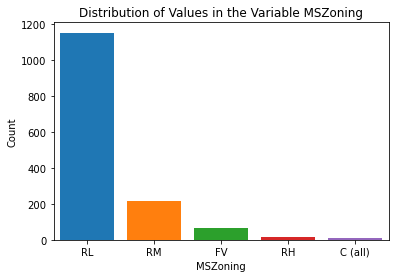

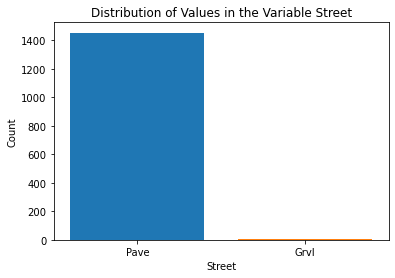

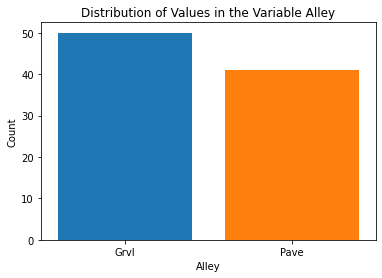

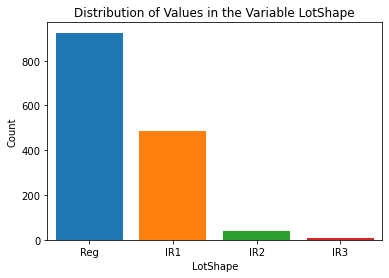

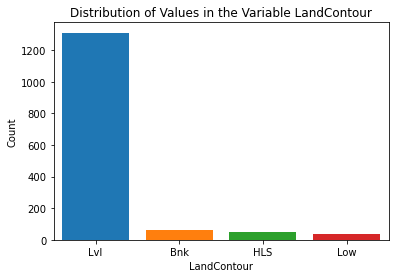

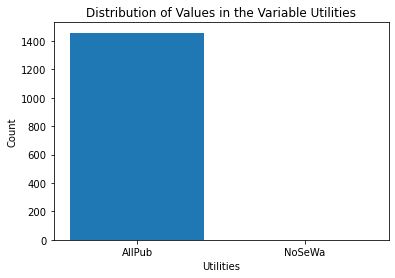

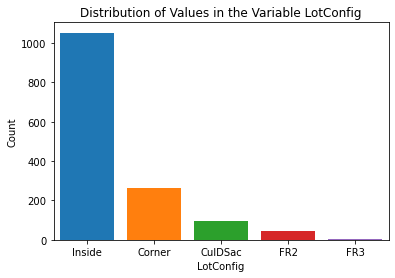

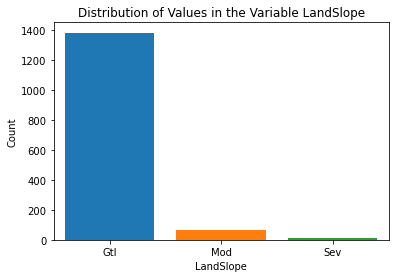

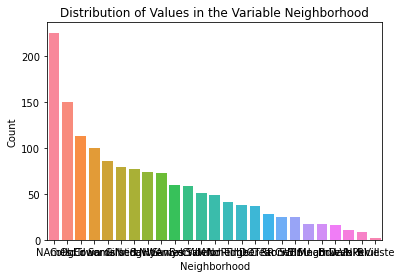

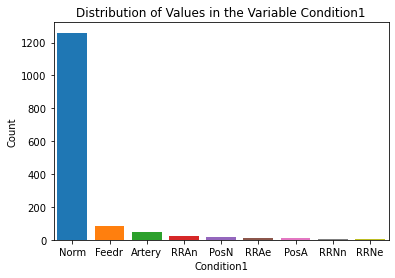

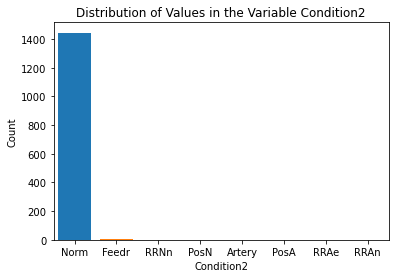

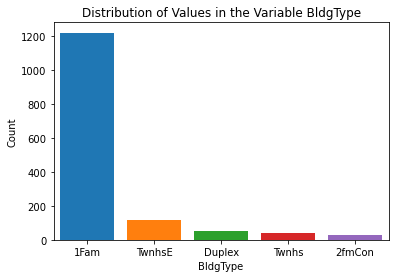

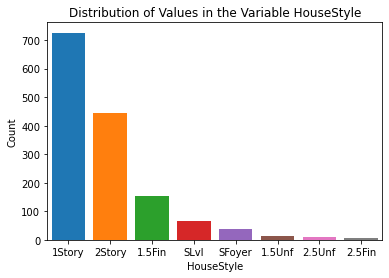

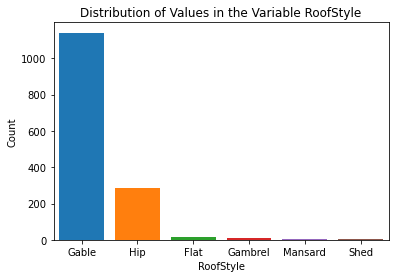

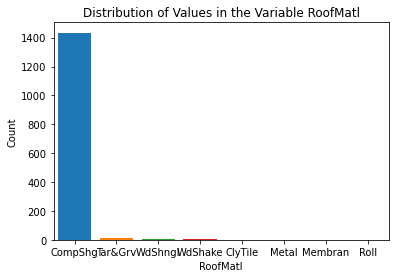

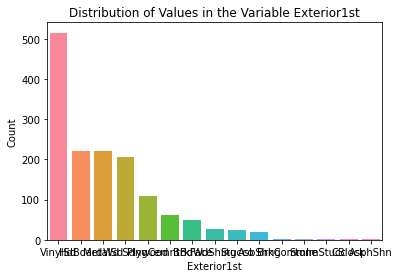

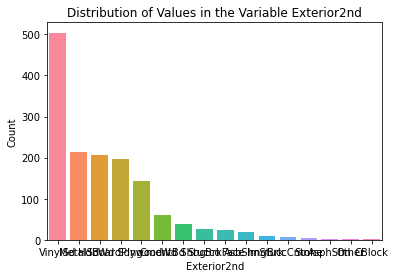

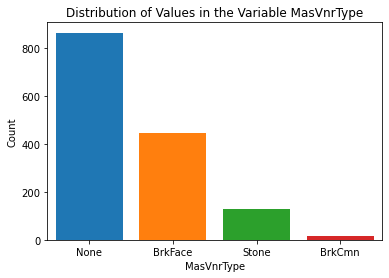

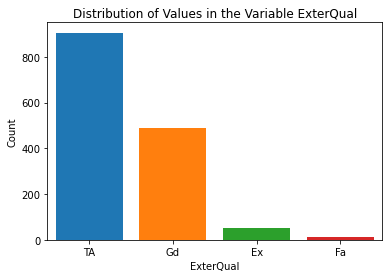

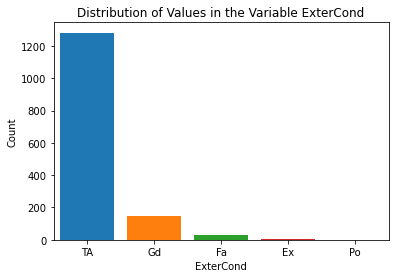

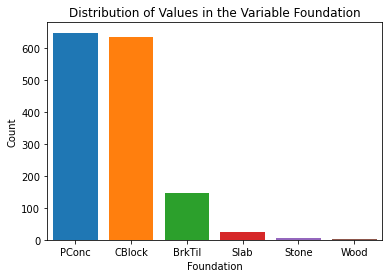

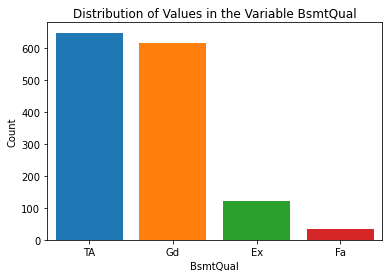

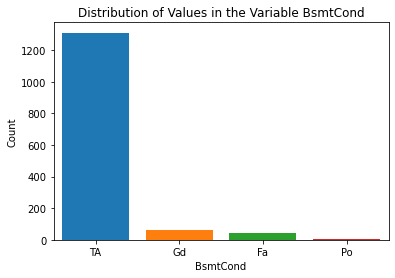

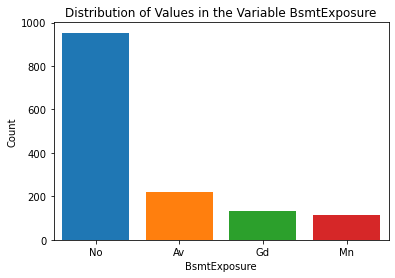

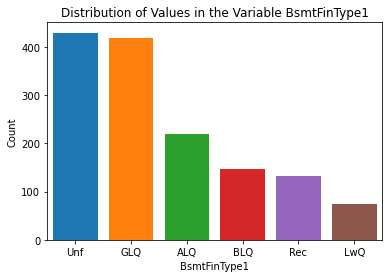

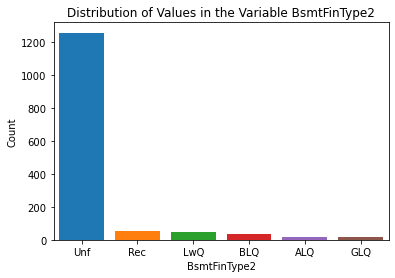

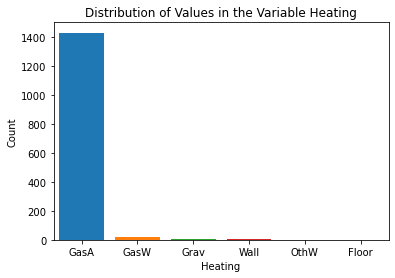

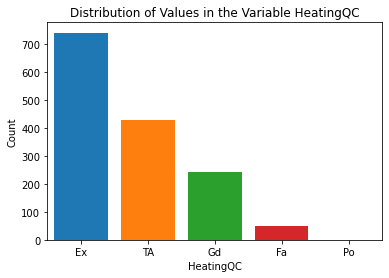

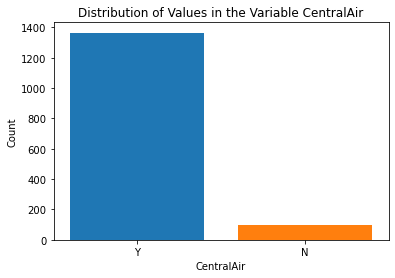

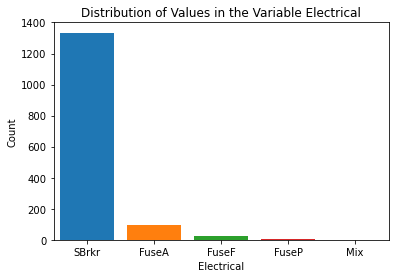

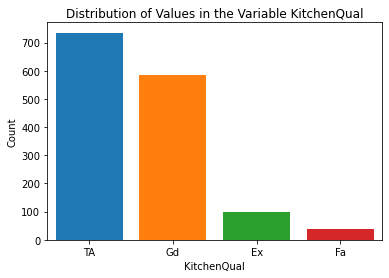

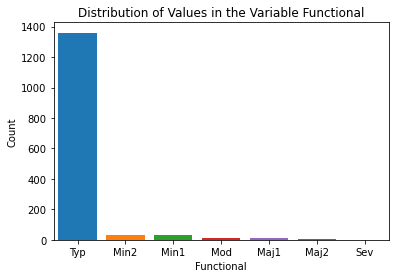

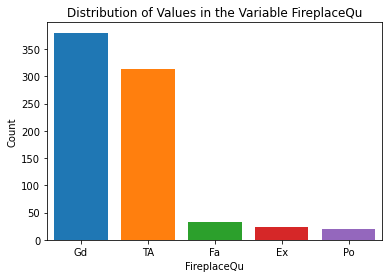

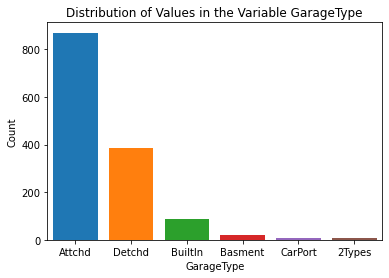

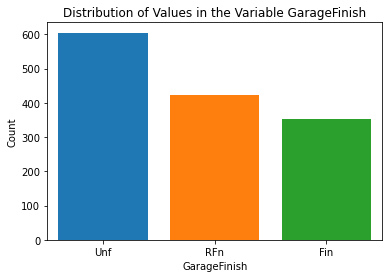

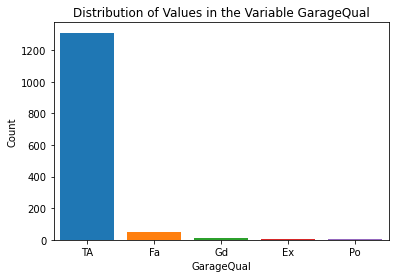

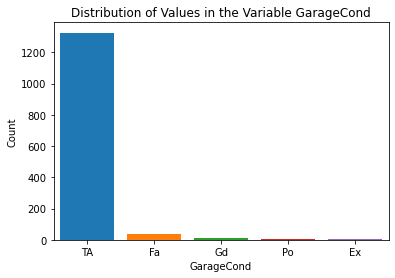

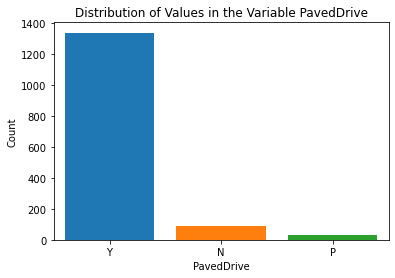

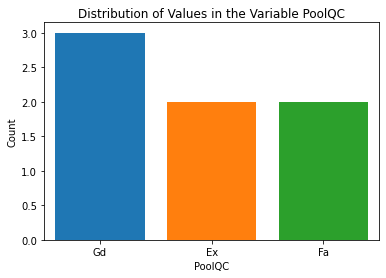

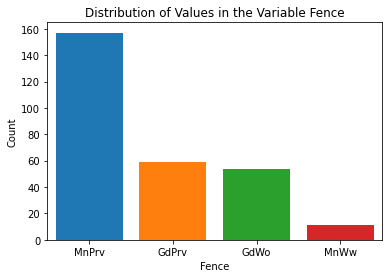

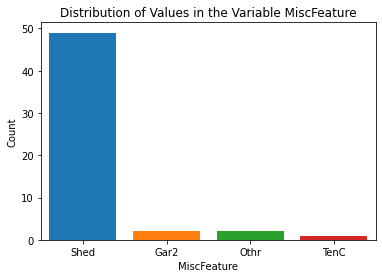

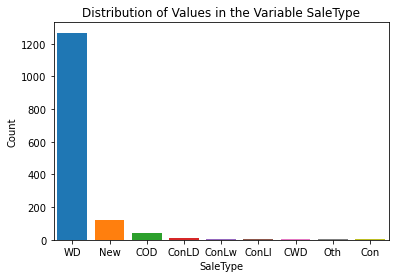

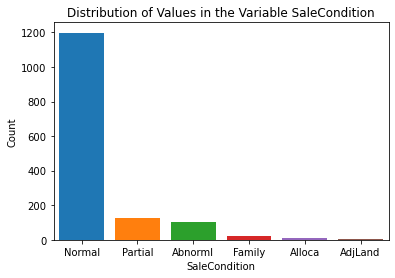

In [108]:
for cat in CategoricalData:
    plt.figure()
    sns.barplot(
    x = CategoricalData[cat].value_counts().index,
    y = CategoricalData[cat].value_counts(),
    saturation  =1).set(title = f"Distribution of Values in the Variable {cat}");
    plt.xlabel(cat)
    plt.ylabel('Count')

<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#049610;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.7px">
    
<p style="text-align:center;">
<span style="font-size:25px;">Machine Learning Model
    </span>
    </p>
    </div>

In [111]:
y  = numericalData.SalePrice

In [114]:
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

X = numericalData[feature_names]

X.head(20).style.background_gradient(cmap='Blues')

In [116]:
X.describe().T.style.background_gradient(cmap = "Purples")

In [117]:
housingprice_model = DecisionTreeRegressor(random_state=1)

housingprice_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

<p style="text-align:center;">
<span style="font-size:25px;"> Predictions
    </span>
    </p>
    

In [118]:
predictions = housingprice_model.predict(X)

print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [120]:
numericalData.head(20).style.background_gradient(cmap = "Purples")

<div class="alert alert-info">
<span style="font-size:15px;">📌  So we indeed pridicted our SalePrice from our model. Note: we are useing a **Supervised Learning Method** 
    </span>
    </div>

<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#9109C6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.7px">
    
<p style="text-align:center;">
<span style="font-size:25px;">Model Validation
    </span>
    </p>
    </div>

In [121]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [122]:
housingprice_model = DecisionTreeRegressor(random_state=1)

housingprice_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [123]:
val_predictions = housingprice_model.predict(val_X)
print((val_y, val_predictions))

(258     231500
267     179500
288     122000
649      84500
1233    142000
         ...  
1017    187500
534     178000
1334    125000
1369    232000
628     135000
Name: SalePrice, Length: 365, dtype: int64, array([186500., 184000., 130000.,  92000., 164500., 220000., 335000.,
       144152., 215000., 262000., 180000., 121000., 175900., 210000.,
       248900., 131000., 100000., 149350., 235000., 156000., 149900.,
       265979., 193500., 377500., 100000., 162900., 145000., 180000.,
       582933., 146000., 140000.,  91500., 112500., 113000., 145000.,
       312500., 110000., 132000., 305000., 128000., 162900., 115000.,
       110000., 124000., 215200., 180000.,  79000., 192000., 282922.,
       235000., 132000., 325000.,  80000., 237000., 208300., 100000.,
       120500., 162000., 153000., 187000., 185750., 335000., 129000.,
       124900., 185750., 133700., 127000., 230000., 146800., 157900.,
       136000., 153575., 335000., 177500., 143000., 202500., 168500.,
       105000., 3059

In [124]:
numericalData.head(20).style.background_gradient(cmap = "Purples")

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:20px;">
<b>The MAE (The Mean absolute Error)
    </b>
    </span>
    </span>
    </p>

In [126]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(mean_absolute_error(val_y, val_predictions))

29652.931506849316


In [127]:
#this is to Underfitting and Overfitting to optimize the size of the tree to make better predictions.

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [128]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)


In [131]:
finalhousing_model = DecisionTreeRegressor(max_leaf_nodes= best_tree_size, random_state=1)
finalhousing_model.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

<p style="text-align:center;">
<span style="color:Purple;">
<span style="font-size:20px;">
<b>Random Forests
    </b>
    </span>
    </span>
    </p>

In [135]:
Foresthousing_model =RandomForestRegressor(random_state=1)
Foresthousing_model.fit(train_X, train_y)
housing_preds = Foresthousing_model.predict(val_X)
rf_val_mae = mean_absolute_error(housing_preds,val_y)
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21857.15912981083


there may be further improvement, but it is a little bit better than the best decision tree of 29653.